## Шаг 1. Изучение общей информации 

Открытие файла, просмотр таблицы:

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
df = pd.read_csv('datasets/real_estate_data.csv', sep='\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Просмотр типов данных и количество пропусков:

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Просмотр имен колонок:

In [3]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Названия трех колонок отличаются по стилю от большинства, приведение к общему стилю:

In [4]:
df.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 'parks_around3000': 'parks_around_3000',
                 'ponds_around3000': 'ponds_around_3000'}, inplace=True)

Исследуем в общем плане данные каждой колонки и выявим на раннем этапе аномалии:

In [5]:
for column in df.columns:
    print(df[column].describe(), '\n')

count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64 

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64 

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64 

count                   23699
unique                   1491
top       2018-02-01T00:00:00
freq                      368
Name: first_day_exposition, dtype: object 

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float

In [6]:
df.query('floors_total > 35').shape[0]

6

In [7]:
df.query('living_area < 7').shape[0]

8

In [8]:
df.query('rooms == 0').shape[0]

197

In [9]:
df.query('rooms == 0')['total_area'].describe()

count    197.000000
mean      29.279746
std       25.855264
min       15.500000
25%       24.050000
50%       26.050000
75%       28.400000
max      371.000000
Name: total_area, dtype: float64

In [10]:
df.query('ceiling_height < 2').shape[0]

3

In [11]:
df.query('ceiling_height > 10').shape[0]

25

Аномалии в ценах:

In [12]:
df.query('last_price < 500000').shape[0]

14

### Вывод

Данные содержат многочисленные пропуски в большинстве колонок. Типы данных нужно оптимизировать: дробные значения привести к целым там, где уместно, дату из строки преобразовать в datetime. Аномальные значения: число комнат (0), высота потолков (меньше двух и больше десяти), этажность здания (выше 52), жилая площадь (меньше 7, учитывая общую площадь), цена (12190). Названия трех колонок исправлены для лучшей читабельности.

## Шаг 2. Предобработка данных

В шаге преобработки создадим временные колонки с заполненными пропусками и исправленными значениями с суффиком filled, после окончания предобработки удалим временные колонки с сохранением заполненных данных.

In [13]:
temp_columns = []

### Аномалии

Выявленная аномалия в ценах - это квартира площадью 111 метров при цене 12190. Лучше всего убрать эту аномалию из данных:

In [14]:
df.drop(labels=[8793], axis=0, inplace=True)

Удалим редкие аномалии:

In [15]:
df.drop(index=df.query('floors_total >=52').index, axis=0, inplace=True)
df.drop(index=df.query('living_area < 7').index, axis=0, inplace=True)

В аномальных больших высотах потолка большинство значений на порядок больше нормальных значений. Если эти аномалии разделить на 10, то они нормализуются:

In [16]:
# создадим колонку с заполненными высотами потолков и добавим ее в список временных колонок
df['ceiling_height_filled'] = df['ceiling_height']
temp_columns.append(['ceiling_height_filled', 'ceiling_height'])
def devide_10(value):
    if value > 20:
        return round(value / 10, 2)
    return value
df['ceiling_height_filled'] = df['ceiling_height_filled'].apply(devide_10)
len(df.query('ceiling_height_filled >= 6 or ceiling_height_filled <= 2'))

23

Считаю, что потолки до двух и от шести метров в 23 квартирах - это очень странно. Лучше избавиться от странных квартир:

In [17]:
df.drop(index=df.query('ceiling_height_filled <= 2 or ceiling_height_filled >= 6').index, axis=0, inplace=True)
len(df.query('ceiling_height_filled >= 6 or ceiling_height_filled <= 2'))

0

In [18]:
df['ceiling_height_filled'].describe()

count    14473.000000
mean         2.726995
std          0.276747
min          2.200000
25%          2.520000
50%          2.650000
75%          2.800000
max          5.800000
Name: ceiling_height_filled, dtype: float64

Теперь потолки стали от 2.2 до 5.8 метров. Пропуски будут обработаны далее.

Аномалии в количестве комнат:

Количество комнат 0 не может быть. Заменим нулевые значения комнат медианным значением числа комнат в схожих по площади квартирах:

In [19]:
temp_columns.append(['rooms_filled', 'rooms'])
df['rooms_filled'] = df['rooms']
# сгруппируем датасет по числу комнат
for group, data in df.groupby('rooms_filled'):
    if group > 0:
        group_median = data['total_area'].median()
        null_values = df.query('rooms_filled == 0 and total_area <= @group_median')
        if len(null_values) > 0:
            df.loc[(df['rooms_filled'] == 0) & (df['total_area'] <= group_median), 'rooms_filled'] = group
            print(f"Комнат {group}, медианная общая площадь {group_median:.2f},",
                  f"заменены нулькомнатные квартиры {len(null_values)}")

Комнат 1, медианная общая площадь 36.56, заменены нулькомнатные квартиры 185
Комнат 2, медианная общая площадь 53.00, заменены нулькомнатные квартиры 5
Комнат 3, медианная общая площадь 73.00, заменены нулькомнатные квартиры 2
Комнат 4, медианная общая площадь 99.30, заменены нулькомнатные квартиры 2
Комнат 12, медианная общая площадь 900.00, заменены нулькомнатные квартиры 1


In [20]:
print('\n', 'Количество квартир с нулем комнат:', len(df.query('rooms_filled == 0')))


 Количество квартир с нулем комнат: 0


### Пропуски в населенном пункте:

In [21]:
df['locality_name'].isna().sum()

49

Пропуски в населенном пункте похожи на технический сбой, такая информация всегда указывается продавцом. Таких записей мало, для удобства дальнейшей работы оптимально заменить на "не_указан":

In [22]:
temp_columns.append(['locality_name_filled', 'locality_name'])
df['locality_name_filled'] = df['locality_name']
df['locality_name_filled'].fillna('не_указан', inplace=True)

Приведем к нижнему регистру название населенного пункта

In [23]:
df['locality_name_filled'] = df['locality_name_filled'].str.lower()

In [24]:
print('Число пропусков в населенном пункте:', df['locality_name_filled'].isna().sum())

Число пропусков в населенном пункте: 0


### Пропуски в высоте потолков:

In [25]:
df.query('ceiling_height_filled.isna()', engine='python').shape[0]

9192

In [26]:
df['ceiling_height_filled'].describe()

count    14473.000000
mean         2.726995
std          0.276747
min          2.200000
25%          2.520000
50%          2.650000
75%          2.800000
max          5.800000
Name: ceiling_height_filled, dtype: float64

Пропуски в высоте потолков могут быть допущены продавцами, ведь это нужно взять рулетку и померить, что непосильно для многих людей. С другой стороны, не на всех площадках есть место для указания высоты потолков. Может быть и технический сбой. Оптимальное решение - заполнить медианой по населенному пункту для равномерного распределения:

In [27]:
for group, data in df.groupby('locality_name_filled'):
    group_median = round(data['ceiling_height_filled'].median(), 2)
    empty_values = df.query('locality_name_filled == @group and ceiling_height_filled.isna()', engine='python')
    if group_median > 0 and len(empty_values) > 0:
        df.loc[(df['locality_name_filled'] == group) & (df['ceiling_height_filled'].isna()), 'ceiling_height_filled'] = group_median
        print(f"{group}, высота потолка {group_median}, сделано замен {len(empty_values)}")

бокситогорск, высота потолка 3.9, сделано замен 14
волосово, высота потолка 2.5, сделано замен 17
волхов, высота потолка 2.58, сделано замен 53
всеволожск, высота потолка 2.7, сделано замен 126
выборг, высота потолка 2.55, сделано замен 139
высоцк, высота потолка 2.5, сделано замен 1
гатчина, высота потолка 2.55, сделано замен 158
городской поселок большая ижора, высота потолка 2.58, сделано замен 4
городской поселок янино-1, высота потолка 2.73, сделано замен 3
городской посёлок будогощь, высота потолка 2.62, сделано замен 2
городской посёлок виллози, высота потолка 2.6, сделано замен 1
городской посёлок лесогорский, высота потолка 2.55, сделано замен 1
городской посёлок мга, высота потолка 2.53, сделано замен 7
городской посёлок назия, высота потолка 2.5, сделано замен 3
городской посёлок новоселье, высота потолка 2.8, сделано замен 16
городской посёлок павлово, высота потолка 2.5, сделано замен 2
городской посёлок рощино, высота потолка 2.62, сделано замен 2
городской посёлок фёдоро

посёлок городского типа вырица, высота потолка 2.6, сделано замен 8
посёлок городского типа имени морозова, высота потолка 2.6, сделано замен 5
посёлок городского типа имени свердлова, высота потолка 2.55, сделано замен 7
посёлок городского типа красный бор, высота потолка 2.6, сделано замен 1
посёлок городского типа кузнечное, высота потолка 2.5, сделано замен 1
посёлок городского типа кузьмоловский, высота потолка 2.52, сделано замен 3
посёлок городского типа лебяжье, высота потолка 2.5, сделано замен 3
посёлок городского типа мга, высота потолка 2.6, сделано замен 3
посёлок городского типа рощино, высота потолка 2.55, сделано замен 5
посёлок городского типа сиверский, высота потолка 2.55, сделано замен 18
посёлок городского типа тайцы, высота потолка 2.7, сделано замен 5
посёлок городского типа токсово, высота потолка 2.6, сделано замен 8
посёлок городского типа ульяновка, высота потолка 2.7, сделано замен 5
посёлок городского типа форносово, высота потолка 2.5, сделано замен 3
посё

In [28]:
df['ceiling_height_filled'].isna().sum()

121

Всё-равно остались пропуски в тех населенных пунктах, где нет информации по высоте потолков. Можно заполнить медианным значением по всем населенным пунктам:

In [29]:
common_median = df['ceiling_height_filled'].median()
empty_values = df['ceiling_height_filled'].isna().sum()
df['ceiling_height_filled'].fillna(common_median, inplace=True)
df['ceiling_height_filled'].isna().sum()
print(f"Медианная высота потолка по всем населенным пунктам {common_median}, сделано замен {empty_values}")

Медианная высота потолка по всем населенным пунктам 2.7, сделано замен 121


In [30]:
df['ceiling_height_filled'].describe()

count    23665.000000
mean         2.704425
std          0.224315
min          2.200000
25%          2.550000
50%          2.700000
75%          2.700000
max          5.800000
Name: ceiling_height_filled, dtype: float64

После заполнения пропусков в высоте потолков медиана увеличилась на 5 см.

In [31]:
print('Число пропусков в высоте потолков:', df['ceiling_height_filled'].isna().sum())

Число пропусков в высоте потолков: 0


### Пропуски в этажности дома:

In [32]:
df.query('floors_total.isna()', engine='python').shape[0]

86

In [33]:
df.query('floors_total.isna() and locality_name_filled == "санкт-петербург"', engine='python').shape[0]

70

Всего 86 пропусков в этажности дома, из них 70 в Питере. Это может быть технический сбой, так как этажность всегда указывается продавцом. Можно оставить без изменений. Можно заменить медианной этажностью по населенному пункту:

In [34]:
temp_columns.append(['floors_total_filled', 'floors_total'])
# создадим колонку с заполненной этажностью дома
df['floors_total_filled'] = df['floors_total']
for group, data in df.groupby('locality_name_filled'):
    group_median = data['floors_total'].median()
    empty_values = df.query('locality_name_filled == @group and floors_total_filled.isna()', engine='python')
    if len(empty_values) > 0:
        df.loc[(df['locality_name_filled'] == group) & (df['floors_total_filled'].isna()), 'floors_total_filled'] = group_median
        print(f"{group}, медианная этажность дома {group_median}, сделано замен {len(empty_values)}")

городской посёлок новоселье, медианная этажность дома 12.0, сделано замен 1
деревня новое девяткино, медианная этажность дома 16.0, сделано замен 1
красное село, медианная этажность дома 6.0, сделано замен 2
кудрово, медианная этажность дома 18.0, сделано замен 2
не_указан, медианная этажность дома 6.0, сделано замен 1
поселок городского типа токсово, медианная этажность дома 6.0, сделано замен 1
поселок мурино, медианная этажность дома 20.0, сделано замен 2
посёлок бугры, медианная этажность дома 14.5, сделано замен 1
посёлок мурино, медианная этажность дома 19.0, сделано замен 2
посёлок стрельна, медианная этажность дома 5.0, сделано замен 1
посёлок шушары, медианная этажность дома 9.0, сделано замен 1
посёлок щеглово, медианная этажность дома 4.0, сделано замен 1
санкт-петербург, медианная этажность дома 9.0, сделано замен 70


In [35]:
df['floors_total_filled'].isna().sum()

0

Напишем функцию, которая заменит найденную выше медианную этажность дома, если она меньше этажа квартиры, на этаж квартиры.

In [36]:
def real_floor(row):
    floors_total_filled = row['floors_total_filled']
    floor = row['floor']
    if floors_total_filled < floor:
        print(f'медианная этажность дома меньше этажа квартиры {floor}, сделана замена')
        return floor
    return floors_total_filled
df['floors_total_filled'] = df.apply(real_floor, axis=1)

медианная этажность дома меньше этажа квартиры 12, сделана замена
медианная этажность дома меньше этажа квартиры 22, сделана замена
медианная этажность дома меньше этажа квартиры 15, сделана замена
медианная этажность дома меньше этажа квартиры 12, сделана замена
медианная этажность дома меньше этажа квартиры 18, сделана замена
медианная этажность дома меньше этажа квартиры 12, сделана замена
медианная этажность дома меньше этажа квартиры 18, сделана замена
медианная этажность дома меньше этажа квартиры 13, сделана замена
медианная этажность дома меньше этажа квартиры 24, сделана замена
медианная этажность дома меньше этажа квартиры 24, сделана замена
медианная этажность дома меньше этажа квартиры 21, сделана замена
медианная этажность дома меньше этажа квартиры 19, сделана замена
медианная этажность дома меньше этажа квартиры 20, сделана замена
медианная этажность дома меньше этажа квартиры 21, сделана замена
медианная этажность дома меньше этажа квартиры 12, сделана замена
медианная 

In [37]:
print('Число пропусков в этажности дома:', df['floors_total_filled'].isna().sum())

Число пропусков в этажности дома: 0


### Пропуски в жилой площади:

In [38]:
df.query('living_area.isna()', engine='python').shape[0]

1901

Пропуски в жилой площади - это может быть технический сбой, так как жилая площадь всегда указывается. Можно заполнить медианной долей жилой площади для групп квартир, сформированных по числу комнат:

In [39]:
temp_columns.append(['living_area_filled', 'living_area'])
# добавим вспомогательную колонку с долей жилой площади
df['living_area_rate'] = df['living_area'] / df['total_area']
# добавим колонку с заполненной жилой площадью
df['living_area_filled'] = df['living_area']
# сгруппируем датасет по числу комнат
for group, data in df.groupby('rooms_filled'):
    empty_values = df.query('rooms_filled == @group and living_area.isna()', engine='python')
    if len(empty_values) > 0:
        group_median = data['living_area_rate'].median()
        df.loc[(df['rooms_filled'] == group) & (df['living_area'].isna()), 'living_area_filled'] = round(group_median * df['total_area'], 2)
        print(f"Комнат {group}, жилая площадь {group_median:.2%}, заполнено пропусков {len(empty_values)}")
# удалим вспомогательную колонку
df.drop(labels=['living_area_rate'], axis=1, inplace=True) 

Комнат 1, жилая площадь 48.48%, заполнено пропусков 671
Комнат 2, жилая площадь 58.52%, заполнено пропусков 643
Комнат 3, жилая площадь 63.17%, заполнено пропусков 448
Комнат 4, жилая площадь 65.97%, заполнено пропусков 91
Комнат 5, жилая площадь 65.18%, заполнено пропусков 34
Комнат 6, жилая площадь 67.94%, заполнено пропусков 6
Комнат 7, жилая площадь 68.17%, заполнено пропусков 6
Комнат 9, жилая площадь 62.83%, заполнено пропусков 1
Комнат 12, жилая площадь 45.52%, заполнено пропусков 1


In [40]:
print('Число пропусков в жилой площади:', df['living_area_filled'].isna().sum())

Число пропусков в жилой площади: 0


### Пропуски в апартаментах:

In [41]:
df.query('is_apartment.isna()', engine='python').shape[0]

20893

In [42]:
df['is_apartment'].value_counts()

False    2723
True       49
Name: is_apartment, dtype: int64

Логично предположить, что пропуски в апартаментах присутствуют там, где жилье не является апартаментами. Оптимальный вариант замены пропусков на False:

In [43]:
temp_columns.append(['is_apartment_filled', 'is_apartment'])
df['is_apartment_filled'] = df['is_apartment']
df['is_apartment_filled'].fillna(False, inplace=True)

In [44]:
print('Число пропусков в апартаментах:', df['is_apartment_filled'].isna().sum())

Число пропусков в апартаментах: 0


### Пропуски в площади кухни:

In [45]:
df.query('kitchen_area.isna()', engine='python').shape[0]

2272

In [46]:
df['kitchen_area'].describe()

count    21393.000000
mean        10.568929
std          5.904475
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Пропуски в площади кухни - это может быть технический сбой, так как кухня есть в каждой квартире. Можно заполнить медианой доли жилой площади для разных категорий квартир, сформированных по числу комнат:

In [47]:
temp_columns.append(['kitchen_area_filled', 'kitchen_area'])
# добавим вспомогательную колонку с долей площади кухни
df['kitchen_area_rate'] = df['kitchen_area'] / df['total_area']
# добавим колонку с заполненной жилой площадью
df['kitchen_area_filled'] = df['kitchen_area']
# сгруппируем датасет по числу комнат
for group, data in df.groupby('rooms_filled'):
    empty_values = df.query('rooms_filled == @group and kitchen_area.isna()', engine='python')
    if len(empty_values) > 0:
        group_median = data['kitchen_area_rate'].median()
        df.loc[(df['rooms_filled'] == group) & (df['kitchen_area'].isna()), 'kitchen_area_filled'] = round(group_median * df['total_area'], 2)
        print(f"Комнат {group}, медианная площадь кухонь {group_median:.2%}, заполнено пропусков {len(empty_values)}")
# удалим вспомогательную колонку
df.drop(labels=['kitchen_area_rate'], axis=1, inplace=True) 

Комнат 1, медианная площадь кухонь 24.78%, заполнено пропусков 1017
Комнат 2, медианная площадь кухонь 16.11%, заполнено пропусков 657
Комнат 3, медианная площадь кухонь 12.86%, заполнено пропусков 436
Комнат 4, медианная площадь кухонь 11.22%, заполнено пропусков 101
Комнат 5, медианная площадь кухонь 10.54%, заполнено пропусков 41
Комнат 6, медианная площадь кухонь 9.95%, заполнено пропусков 8
Комнат 7, медианная площадь кухонь 8.37%, заполнено пропусков 7
Комнат 8, медианная площадь кухонь 10.92%, заполнено пропусков 3
Комнат 9, медианная площадь кухонь 4.96%, заполнено пропусков 1
Комнат 12, медианная площадь кухонь 12.44%, заполнено пропусков 1


In [48]:
print('Число пропусков в кухнях:', df['kitchen_area_filled'].isna().sum())

Число пропусков в кухнях: 0


### Пропуски в балконах:

In [49]:
df.query('balcony.isna()', engine='python').shape[0]

11496

In [50]:
df['balcony'].describe()

count    12169.000000
mean         1.149396
std          1.070509
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

Пропуски в балконах могут быть допущены продавцами в случаях отсутствия балкона. Оптимально заменить на ноль:

In [51]:
temp_columns.append(['balcony_filled', 'balcony'])
df['balcony_filled'] = df['balcony']
df['balcony_filled'].fillna(0, inplace=True)

In [52]:
print('Число пропусков в балконах:', df['balcony_filled'].isna().sum())

Число пропусков в балконах: 0


### Пропуски в аэропортах:

In [53]:
df.query('airports_nearest.isna()', engine='python').shape[0]

5531

In [54]:
df['airports_nearest'].describe()

count    18134.000000
mean     28794.206518
std      12631.954987
min          0.000000
25%      18582.000000
50%      26726.000000
75%      37284.000000
max      84869.000000
Name: airports_nearest, dtype: float64

Пропуски в аэропортах могут быть допущены из-за большой отдаленности или технического сбоя. Можно заменить на медианное расстояние по каждому населенному пункту.

In [55]:
temp_columns.append(['airports_nearest_filled', 'airports_nearest'])
# создадим колонку с заполненными аэропортами
df['airports_nearest_filled'] = df['airports_nearest']
for group, data in df.groupby('locality_name_filled'):
    empty_values = df.query('locality_name_filled == @group and airports_nearest.isna()', engine='python')
    group_median = data['airports_nearest'].median()
    if len(empty_values) > 0 and group_median > 0:
        df.loc[(df['locality_name_filled'] == group) & (df['airports_nearest'].isna()), 'airports_nearest_filled'] =\
            group_median
        print(f"{group}, расстояние до аэропорта {group_median}, сделано замен {len(empty_values)}")
print('\n', 'Заполнено пропусков',
     df['airports_nearest'].isna().sum() - df['airports_nearest_filled'].isna().sum())

колпино, расстояние до аэропорта 26232.0, сделано замен 1
красное село, расстояние до аэропорта 25717.0, сделано замен 2
кронштадт, расстояние до аэропорта 67872.5, сделано замен 1
ломоносов, расстояние до аэропорта 48415.5, сделано замен 1
не_указан, расстояние до аэропорта 22041.0, сделано замен 8
поселок мурино, расстояние до аэропорта 51553.0, сделано замен 32
посёлок шушары, расстояние до аэропорта 17427.0, сделано замен 4
посёлок щеглово, расстояние до аэропорта 61908.0, сделано замен 22
санкт-петербург, расстояние до аэропорта 26756.5, сделано замен 85

 Заполнено пропусков 156


Большинство населенных пунктов не имеет информации по расстоянию до аэропортов. Пропуски есть в местах и рядом, и далеко от аэропорта, поэтому в данном случае оптимальнее оставить пропуски там, где не получилось найти медианные значения.

### Пропуски в центрах города:

In [56]:
df.query('city_centers_nearest.isna()', engine='python').shape[0]

5508

In [57]:
df['city_centers_nearest'].describe()

count    18157.000000
mean     14191.577133
std       8607.133462
min        181.000000
25%       9238.000000
50%      13104.000000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

Пропуски в центрах города допущены в населенных пунктах из-за отсутствия такого явно обозначенного места или технического сбоя. Можно найти медианное значение по населенному пункту, как в случае с аэропортами:

In [58]:
temp_columns.append(['city_centers_nearest_filled', 'city_centers_nearest'])
# создадим колонку с заполненными центрами города
df['city_centers_nearest_filled'] = df['city_centers_nearest']
for group, data in df.groupby('locality_name_filled'):
    empty_values = df.query('locality_name_filled == @group and city_centers_nearest.isna()', engine='python')
    group_median = data['city_centers_nearest'].median()
    if len(empty_values) > 0 and group_median > 0:
        df.loc[(df['locality_name_filled'] == group) & (df['city_centers_nearest'].isna()), 'city_centers_nearest_filled'] =\
            group_median
        print(f"{group}, расстояние до центра {group_median}, сделано замен {len(empty_values)}")
print('\n', 'Заполнено пропусков',
     df['city_centers_nearest'].isna().sum() - df['city_centers_nearest_filled'].isna().sum())

колпино, расстояние до центра 32018.0, сделано замен 1
красное село, расстояние до центра 29142.0, сделано замен 2
кронштадт, расстояние до центра 49597.5, сделано замен 1
ломоносов, расстояние до центра 51677.0, сделано замен 1
не_указан, расстояние до центра 8943.0, сделано замен 8
поселок мурино, расстояние до центра 21888.0, сделано замен 32
посёлок шушары, расстояние до центра 24212.0, сделано замен 4
посёлок щеглово, расстояние до центра 34085.0, сделано замен 22
пушкин, расстояние до центра 27930.5, сделано замен 1
санкт-петербург, расстояние до центра 12245.0, сделано замен 61

 Заполнено пропусков 133


Большинство населенных пунктов не имеет информации по расстоянию до центра. В данном случае оптимальнее оставить пропуски там, где не получилось найти медианные значения.

### Пропуски в количестве парков:

In [59]:
df.query('parks_around_3000.isna()', engine='python').shape[0]

5507

In [60]:
len(df.query('parks_around_3000.isna() and parks_nearest.isna()', engine='python'))

5507

In [61]:
df['parks_around_3000'].describe()

count    18158.000000
mean         0.611025
std          0.802035
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around_3000, dtype: float64

Там, где есть пропуски в количестве парков, одновременно отсутствует и расстояние до ближайшего парка. Очевидно, что пропуски там, где нет парков на ближайшие 3 км. Логично заменить на ноль:

In [62]:
temp_columns.append(['parks_around_3000_filled', 'parks_around_3000'])
df['parks_around_3000_filled'] = df['parks_around_3000']
df['parks_around_3000_filled'].fillna(0, inplace=True)

In [63]:
print('Число пропусков в количестве парков:', df['parks_around_3000_filled'].isna().sum())

Число пропусков в количестве парков: 0


### Пропуски в расстояниях до ближайшего парка:

In [64]:
df.query('parks_nearest.isna()', engine='python').shape[0]

15602

In [65]:
len(df.query('parks_nearest.isna() and parks_around_3000_filled > 0', engine='python'))

0

In [66]:
df['parks_nearest'].describe()

count    8063.000000
mean      490.650502
std       342.519088
min         1.000000
25%       287.500000
50%       454.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Там, где отсутствует информация о расстоянии до ближайшего парка, количество парков составляет ноль или отсутствует. Очевидно, что в пропуски там, где нет парков на ближайшие 3 км. Логично заменить на ноль:

In [67]:
temp_columns.append(['parks_nearest_filled', 'parks_nearest'])
df['parks_nearest_filled'] = df['parks_nearest']
df['parks_nearest_filled'].fillna(0, inplace=True)

In [68]:
print('Число пропусков в расстоянии до парка:', df['parks_nearest_filled'].isna().sum())

Число пропусков в расстоянии до парка: 0


### Пропуски в количестве водоемов:

In [69]:
df.query('ponds_around_3000.isna()', engine='python').shape[0]

5507

In [70]:
len(df.query('ponds_around_3000.isna() and ponds_nearest.isna()', engine='python'))

5507

In [71]:
df['ponds_around_3000'].describe()

count    18158.000000
mean         0.770019
std          0.938067
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around_3000, dtype: float64

Там, где отсутствует информация о количестве водоемов, также отсутствует информация и о расстоянии до ближайшего водоема. Очевидно, что в пропуски там, где нет водоемов на ближайшие 3 км. Логично заменить на ноль:

In [72]:
temp_columns.append(['ponds_around_3000_filled', 'ponds_around_3000'])
df['ponds_around_3000_filled'] = df['ponds_around_3000']
df['ponds_around_3000_filled'].fillna(0, inplace=True)

In [73]:
print('Число пропусков в количестве водоемов:', df['ponds_around_3000_filled'].isna().sum())

Число пропусков в количестве водоемов: 0


### Пропуски в расстояниях до ближайших водоемов:

In [74]:
df.query('ponds_nearest.isna()', engine='python').shape[0]

14567

In [75]:
len(df.query('ponds_nearest.isna() and ponds_around_3000_filled > 0', engine='python'))

0

Где пустое расстояние до ближайшего водоема, там же пусто или ноль по количеству водоемов. Логично заменить на ноль:

In [76]:
temp_columns.append(['ponds_nearest_filled', 'ponds_nearest'])
df['ponds_nearest_filled'] = df['ponds_nearest']
df['ponds_nearest_filled'].fillna(0, inplace=True)

In [77]:
print('Число пропусков в расстоянии до парка:', df['ponds_nearest_filled'].isna().sum())

Число пропусков в расстоянии до парка: 0


### Пропуски в сроке размещения объявления:

In [78]:
df.query('days_exposition.isna()', engine='python').shape[0]

3177

In [79]:
df['days_exposition'].describe()

count    20488.000000
mean       180.949287
std        219.827057
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Возможная причина отсутствующих значений в сроке публикации объявлений - технический сбой, связанный с отсутствием информации о датах продажи, так как такая информация формируется автоматически без участия продавцов. Возможное решение - заполнить пропуски медианными значениями по населенным пунктам:

In [80]:
temp_columns.append(['days_exposition_filled', 'days_exposition'])
# создадим колонку с заполненными днями продажи
df['days_exposition_filled'] = df['days_exposition']
for group, data in df.groupby('locality_name_filled'):
    empty_values = df.query('locality_name_filled == @group and days_exposition.isna()', engine='python')
    group_median = data['days_exposition'].median()
    if len(empty_values) > 0 and group_median > 0:
        df.loc[(df['locality_name_filled'] == group) & (df['days_exposition'].isna()), 'days_exposition_filled'] =\
            group_median
        print(f"{group}, дней продажи квартиры {group_median:.0f}, сделано замен {len(empty_values)}")

бокситогорск, дней продажи квартиры 45, сделано замен 2
волосово, дней продажи квартиры 114, сделано замен 5
волхов, дней продажи квартиры 104, сделано замен 26
всеволожск, дней продажи квартиры 123, сделано замен 58
выборг, дней продажи квартиры 100, сделано замен 29
гатчина, дней продажи квартиры 100, сделано замен 39
городской поселок большая ижора, дней продажи квартиры 58, сделано замен 4
городской посёлок мга, дней продажи квартиры 66, сделано замен 6
городской посёлок назия, дней продажи квартиры 142, сделано замен 3
городской посёлок новоселье, дней продажи квартиры 100, сделано замен 4
городской посёлок павлово, дней продажи квартиры 45, сделано замен 2
городской посёлок рощино, дней продажи квартиры 60, сделано замен 4
городской посёлок фёдоровское, дней продажи квартиры 143, сделано замен 4
городской посёлок янино-1, дней продажи квартиры 58, сделано замен 10
деревня агалатово, дней продажи квартиры 42, сделано замен 1
деревня аро, дней продажи квартиры 137, сделано замен 1


посёлок поляны, дней продажи квартиры 200, сделано замен 2
посёлок понтонный, дней продажи квартиры 88, сделано замен 3
посёлок пригородный, дней продажи квартиры 244, сделано замен 1
посёлок репино, дней продажи квартиры 238, сделано замен 1
посёлок сапёрный, дней продажи квартиры 329, сделано замен 1
посёлок сосново, дней продажи квартиры 90, сделано замен 8
посёлок станции громово, дней продажи квартиры 88, сделано замен 1
посёлок старая малукса, дней продажи квартиры 172, сделано замен 1
посёлок стеклянный, дней продажи квартиры 48, сделано замен 1
посёлок стрельна, дней продажи квартиры 122, сделано замен 6
посёлок тельмана, дней продажи квартиры 69, сделано замен 6
посёлок усть-луга, дней продажи квартиры 45, сделано замен 1
посёлок шушары, дней продажи квартиры 92, сделано замен 32
посёлок щеглово, дней продажи квартиры 61, сделано замен 2
приморск, дней продажи квартиры 116, сделано замен 1
приозерск, дней продажи квартиры 162, сделано замен 15
пушкин, дней продажи квартиры 130

In [81]:
print('Пустые значения', df['days_exposition_filled'].isna().sum())

Пустые значения 80


In [82]:
df.query('days_exposition_filled.isna()', engine='python')['locality_name'].value_counts()

Мурино                                               34
поселок Цвелодубово                                   4
деревня Торошковичи                                   3
поселок Лукаши                                        3
посёлок Победа                                        3
городской посёлок Советский                           2
городской посёлок Лесогорский                         2
поселок Лесное                                        2
деревня Коркино                                       2
деревня Раздолье                                      1
деревня Чудской Бор                                   1
деревня Кривко                                        1
посёлок Сумино                                        1
садовое товарищество Новая Ропша                      1
поселок Рабитицы                                      1
посёлок Мыза-Ивановка                                 1
деревня Курковицы                                     1
деревня Меньково                                

Осталось пропуски, которые нечем заполнить.

### Типы данных

Удалим временные колонки, переместив значения в исходные колонки:

In [83]:
for new_column, old_column in temp_columns:
    try:
        df.drop(labels=old_column, axis=1, inplace=True)
        df.rename(columns={new_column: old_column}, inplace=True)
    except:
        pass

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23665 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23665 non-null  int64  
 1   last_price            23665 non-null  float64
 2   total_area            23665 non-null  float64
 3   first_day_exposition  23665 non-null  object 
 4   floor                 23665 non-null  int64  
 5   studio                23665 non-null  bool   
 6   open_plan             23665 non-null  bool   
 7   ceiling_height        23665 non-null  float64
 8   rooms                 23665 non-null  int64  
 9   locality_name         23665 non-null  object 
 10  floors_total          23665 non-null  float64
 11  living_area           23665 non-null  float64
 12  is_apartment          23665 non-null  bool   
 13  kitchen_area          23665 non-null  float64
 14  balcony               23665 non-null  float64
 15  airports_nearest   

После заполнения пропусков остались 3 колонки с пропусками (расстояния до центра и аэропорта, сроке размещения объявления), которые нечем заменить, сохранив при этом смысл данных.

Типы данных дробные можно заменить на целые в колонках с ценой, этажностью, балконами, расстояниями и сроком публикации для устранения избыточности данных:

In [85]:
df = df.astype({'last_price': 'int', 'floors_total': 'int', 'balcony': 'int', 
                'parks_around_3000': 'int', 'parks_nearest': 'int', 
                'ponds_around_3000': 'int', 'ponds_nearest': 'int',})

Тип данных колонки с датой публикации можно заменить со строки на дату-время:

In [86]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23665 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23665 non-null  int64         
 1   last_price            23665 non-null  int32         
 2   total_area            23665 non-null  float64       
 3   first_day_exposition  23665 non-null  datetime64[ns]
 4   floor                 23665 non-null  int64         
 5   studio                23665 non-null  bool          
 6   open_plan             23665 non-null  bool          
 7   ceiling_height        23665 non-null  float64       
 8   rooms                 23665 non-null  int64         
 9   locality_name         23665 non-null  object        
 10  floors_total          23665 non-null  int32         
 11  living_area           23665 non-null  float64       
 12  is_apartment          23665 non-null  bool          
 13  kitchen_area    

### Предобработка данных: выводы

На этапе предобработки выявлены и обработаны некоторые аномалии; выявлены и заполнены большинство пропусков значениями, взятых с подобных групп данных, типы данных оптимизированы.

## Шаг 3. Добавление новых данных в таблицу

Добавление цены квадратного метра:

In [88]:
df['price_m2'] = (df['last_price'] / df['total_area']).astype('int')
df['price_m2'].describe().astype('int')

count      23665
mean       99382
std        50041
min         7962
25%        76621
50%        95000
75%       114247
max      1907500
Name: price_m2, dtype: int32

Добавление дня недели, месяца и года публикации объявления:

In [89]:
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday
df['month_exposition'] = df['first_day_exposition'].dt.month
df['year_exposition'] = df['first_day_exposition'].dt.year
df.head()

,total_images,last_price,total_area,first_day_exposition,floor,studio,open_plan,ceiling_height,rooms,locality_name,floors_total,living_area,is_apartment,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_m2,weekday_exposition,month_exposition,year_exposition
0,20,13000000,108.0,2019-03-07,8,False,False,2.70,3,санкт-петербург,16,51.00,False,25.00,0,18863.0,16028.0,1,482,2,755,95.0,120370,3,3,2019
1,7,3350000,40.4,2018-12-04,1,False,False,2.63,1,посёлок шушары,11,18.60,False,11.00,2,12817.0,18603.0,0,0,0,0,81.0,82920,1,12,2018
2,10,5196000,56.0,2015-08-20,4,False,False,2.70,2,санкт-петербург,5,34.30,False,8.30,0,21741.0,13933.0,1,90,2,574,558.0,92785,3,8,2015
3,0,64900000,159.0,2015-07-24,9,False,False,2.70,3,санкт-петербург,14,100.43,False,20.44,0,28098.0,6800.0,2,84,3,234,424.0,408176,4,7,2015
4,2,10000000,100.0,2018-06-19,13,False,False,3.03,2,санкт-петербург,14,32.00,False,41.00,0,31856.0,8098.0,2,112,1,48,121.0,100000,1,6,2018


Добавление колонки со строковым типом этажа:

In [90]:
def floor_type(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floors_total == floor:
        return 'последний'
    if floor == 1:
        return 'первый'
    return 'другой'
df['floor_type'] = df.apply(floor_type, axis=1)
df['floor_type'].value_counts()

другой       17388
последний     3391
первый        2886
Name: floor_type, dtype: int64

Добавление колонки с числовым типом этажа для дальнейшего анализа:

In [91]:
# 100 - первый этаж, 200 - другой этаж, 300 - последний этаж
def floor_type_int(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floors_total == floor:
        return 300
    if floor == 1:
        return 100
    return 200
df['floor_type_int'] = df.apply(floor_type_int, axis=1)
df['floor_type_int'].value_counts()

200    17388
300     3391
100     2886
Name: floor_type_int, dtype: int64

Добавление колонки с соотношением жилой и общей площади в процентах:

In [92]:
df['rate_living_total'] = (df['living_area'] / df['total_area'] * 100).astype('int')
df['rate_living_total'].describe()

count    23665.000000
mean        56.035707
std         10.230608
min         13.000000
25%         49.000000
50%         57.000000
75%         63.000000
max        100.000000
Name: rate_living_total, dtype: float64

In [93]:
df.query('(living_area + kitchen_area) > total_area').shape[0]

159

Присутствуют квартиры с меньшей общей площадью, чем сумма жилой площади и кухни. Это аномалия.

Добавление колонки с соотношением кухни и общей площади в процентах:

In [94]:
df['rate_kitchen_total'] = (df['kitchen_area'] / df['total_area'] * 100).astype('int')
df['rate_kitchen_total'].describe()

count    23665.000000
mean        18.271244
std          7.127337
min          2.000000
25%         13.000000
50%         17.000000
75%         23.000000
max         78.000000
Name: rate_kitchen_total, dtype: float64

In [95]:
df.query('kitchen_area > living_area').shape[0]

349

Присутствуют квартиры с кухней больше, чем жилая площадь. Это аномалия.

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23665 entries, 0 to 23698
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23665 non-null  int64         
 1   last_price            23665 non-null  int32         
 2   total_area            23665 non-null  float64       
 3   first_day_exposition  23665 non-null  datetime64[ns]
 4   floor                 23665 non-null  int64         
 5   studio                23665 non-null  bool          
 6   open_plan             23665 non-null  bool          
 7   ceiling_height        23665 non-null  float64       
 8   rooms                 23665 non-null  int64         
 9   locality_name         23665 non-null  object        
 10  floors_total          23665 non-null  int32         
 11  living_area           23665 non-null  float64       
 12  is_apartment          23665 non-null  bool          
 13  kitchen_area    

# Шаг 4. Исследовательский анализ данных

## Изучение параметров

Создадим функцию, выводящую отчет по интересующей нас колонке, для дальнейшего использования:

In [97]:
def report(the_column, data):
    # Объявление переменных для дальнейшего использования:
    bins = 100
    figsize = (15, 5)

    print(f"Информация по параметру {the_column}:")
    d = data[the_column].describe().astype(data[the_column].dtype)
    print("\n", d)

    print("\n", 'Все значения:')
    data[the_column].hist(bins=bins, figsize=figsize)
    plt.show()

    print("\n", 'Межквартильный размах:')
    min_point = max(d['25%'] - (d['75%'] - d['25%']) * 1.5, d['min'])
    max_point = d['75%'] + (d['75%'] - d['25%']) * 1.5
    data[the_column].hist(bins=bins, range=(min_point, max_point), figsize=figsize)
    plt.show()

    print("\n", 'Боксплот:')
    plt.figure(figsize=figsize)
    add_space = (max_point - min_point) * 0.1
    plt.ylim(min_point - add_space, max_point + add_space)
    data.boxplot(column=the_column, figsize=figsize)
    plt.show()

    often_records = len(data[(data[the_column] >= d['25%']) & (data[the_column] < d['75%'])])

    
    print("\n", f"Межквартильный размах в диапазоне {d['25%']:.2f}-{d['75%']:.2f},",
          f" всего {often_records} записей")
    print("\n", f"Нижний ус боксплота в диапазоне {min_point:.2f}-{d['25%']:.2f}, всего",
          f"{len(data[((data[the_column] >= min_point) & (data[the_column] < d['25%']))])} записей")
    print("\n", f"Верхний ус боксплота в диапазоне {d['75%']:.2f}-{max_point:.2f}, всего",
          f"{len(data[((data[the_column] >= d['75%']) & (data[the_column] < max_point))])} записей")
    
    if min_point > d['min']:
        print("\n", f"Редкие и выбивающиеся значения вне боксплота в диапазоне {d['min']:.2f}-{min_point:.2f},",
              f"всего {len(data[data[the_column] < min_point])} записей:")
        data[the_column].hist(bins=bins, range=(d['min'], min_point), figsize=figsize)
        plt.show()
          
    if max_point < d['max']:
        print("\n", f"Редкие и выбивающиеся значения вне боксплота в диапазоне {max_point:.2f}-{d['max']:.2f} включительно,",
              f"всего {len(data[data[the_column] >= max_point])} записей:")
        data[the_column].hist(bins=bins, range=(max_point, d['max']), figsize=figsize)

### Общая площадь

Информация по параметру total_area:

 count    23665.000000
mean        60.356541
std         35.655866
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

 Все значения:


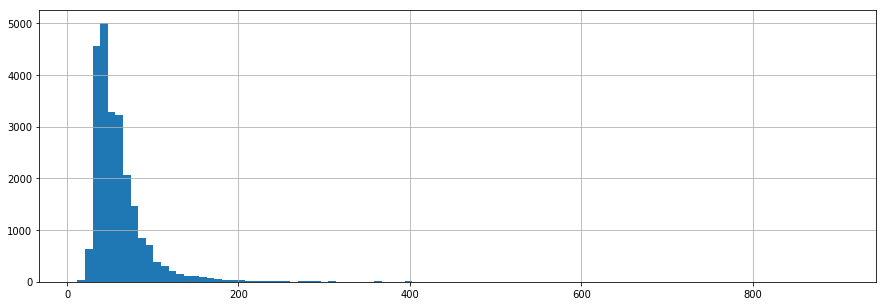


 Межквартильный размах:


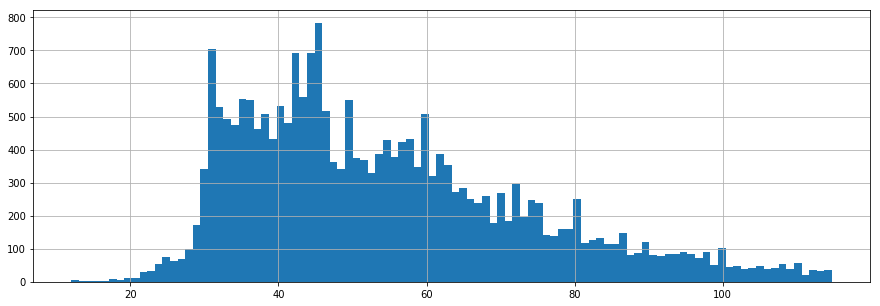


 Боксплот:


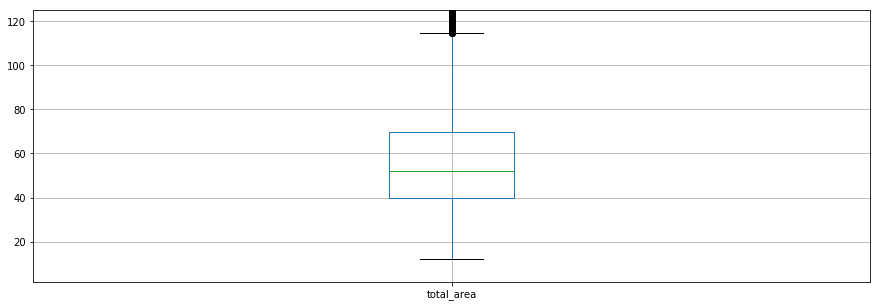


 Межквартильный размах в диапазоне 40.00-69.90,  всего 12030 записей

 Нижний ус боксплота в диапазоне 12.00-40.00, всего 5715 записей

 Верхний ус боксплота в диапазоне 69.90-114.75, всего 4682 записей

 Редкие и выбивающиеся значения вне боксплота в диапазоне 114.75-900.00 включительно, всего 1238 записей:


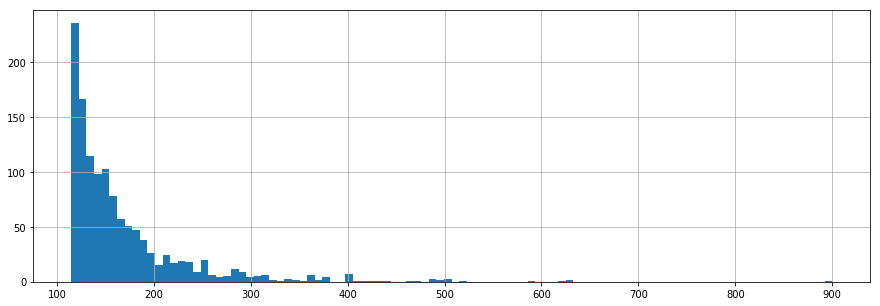

In [98]:
report('total_area', df)

### Цена

Информация по параметру last_price:

 count        23665
mean       6537412
std       10862758
min         430000
25%        3408000
50%        4650000
75%        6800000
max      763000000
Name: last_price, dtype: int32

 Все значения:


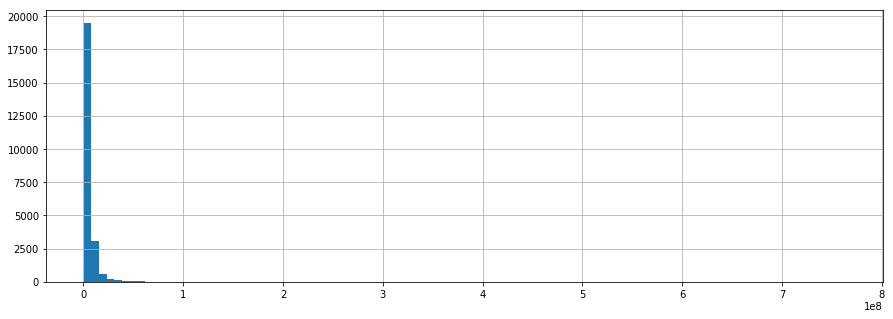


 Межквартильный размах:


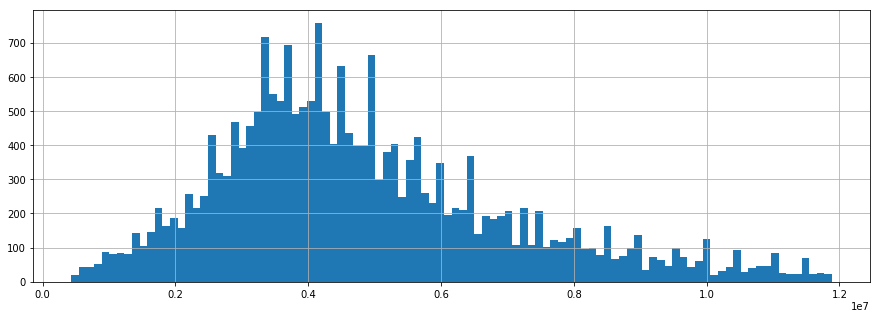


 Боксплот:


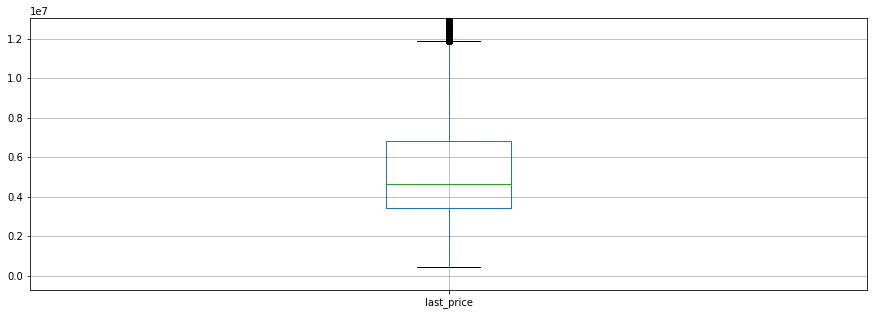


 Межквартильный размах в диапазоне 3408000.00-6800000.00,  всего 11827 записей

 Нижний ус боксплота в диапазоне 430000.00-3408000.00, всего 5916 записей

 Верхний ус боксплота в диапазоне 6800000.00-11888000.00, всего 3864 записей

 Редкие и выбивающиеся значения вне боксплота в диапазоне 11888000.00-763000000.00 включительно, всего 2058 записей:


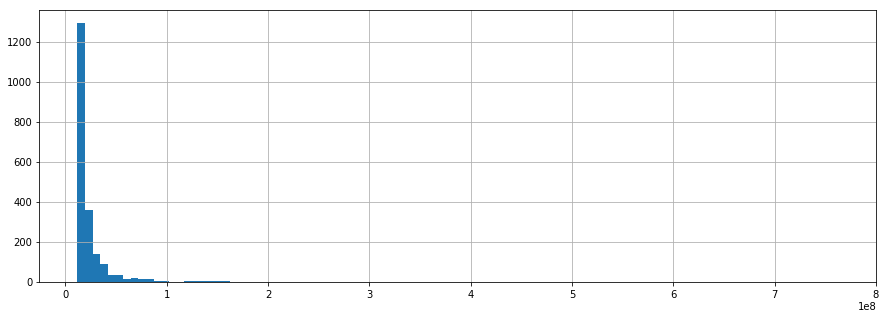

In [99]:
report('last_price', df)

Обнаружим аномалии в ценах:

In [100]:
df.query('price_m2 < 10000').shape[0]

2

In [101]:
df.query('price_m2 > 1000000').shape[0]

4

In [102]:
df.query('last_price > 100000000').shape[0]

36

Есть цены невероятно низкие, есть весьма высокие, но ничего подозрительного.

### Число комнат

Информация по параметру rooms:

 count    23665
mean         2
std          1
min          1
25%          1
50%          2
75%          3
max         19
Name: rooms, dtype: int64

 Все значения:


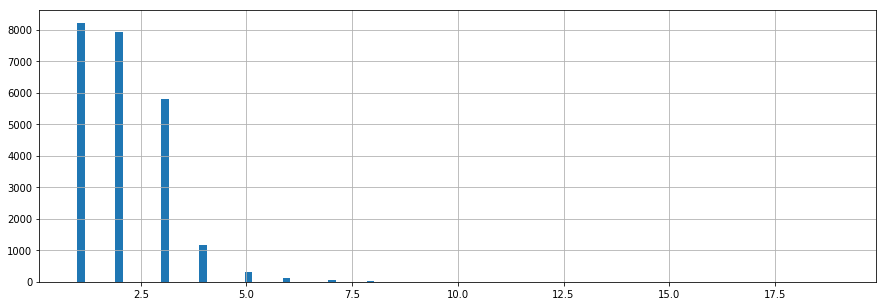


 Межквартильный размах:


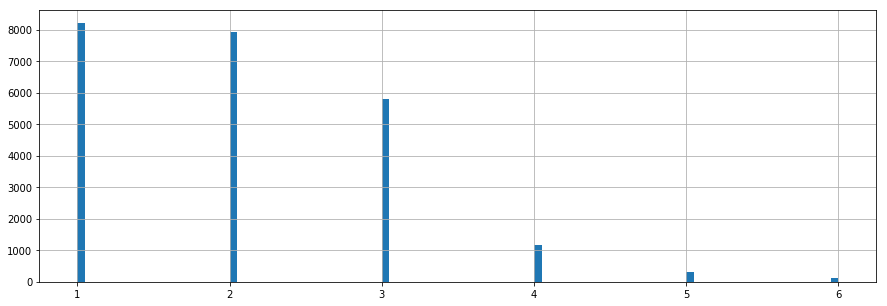


 Боксплот:


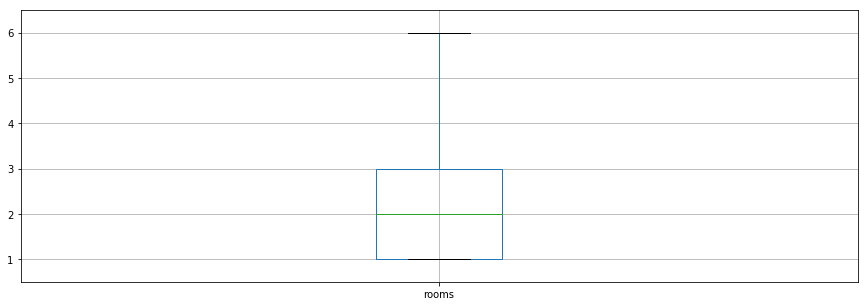


 Межквартильный размах в диапазоне 1.00-3.00,  всего 16153 записей

 Нижний ус боксплота в диапазоне 1.00-1.00, всего 0 записей

 Верхний ус боксплота в диапазоне 3.00-6.00, всего 7316 записей

 Редкие и выбивающиеся значения вне боксплота в диапазоне 6.00-19.00 включительно, всего 196 записей:


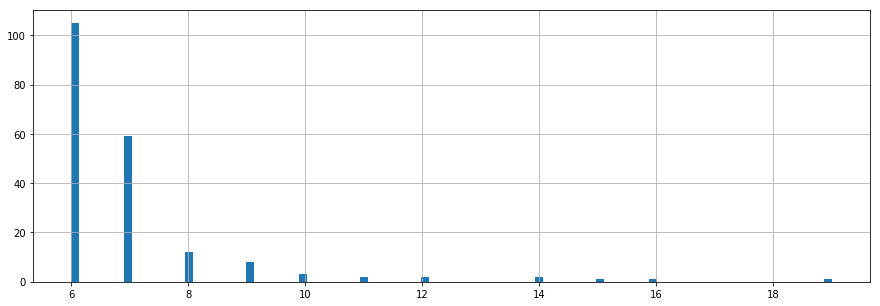

In [103]:
report('rooms', df)

### Высота потолков

Информация по параметру ceiling_height:

 count    23665.000000
mean         2.704425
std          0.224315
min          2.200000
25%          2.550000
50%          2.700000
75%          2.700000
max          5.800000
Name: ceiling_height, dtype: float64

 Все значения:


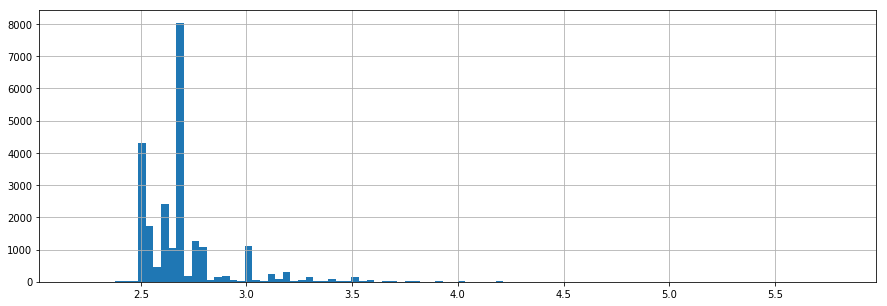


 Межквартильный размах:


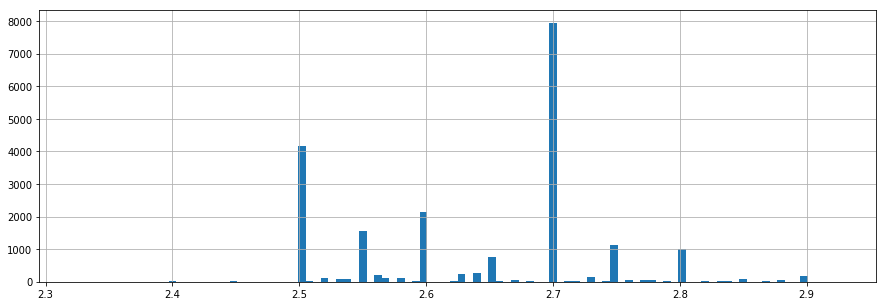


 Боксплот:


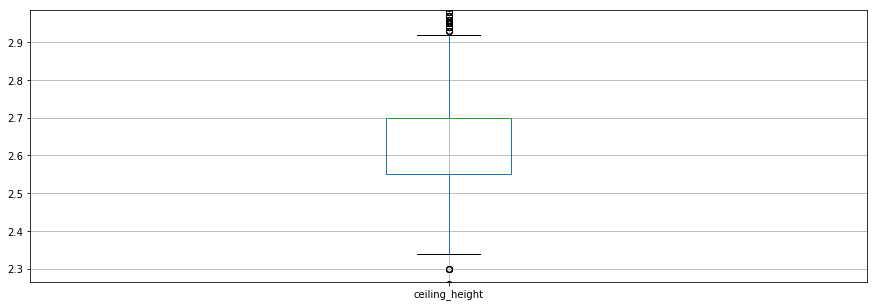


 Межквартильный размах в диапазоне 2.55-2.70,  всего 5567 записей

 Нижний ус боксплота в диапазоне 2.32-2.55, всего 4526 записей

 Верхний ус боксплота в диапазоне 2.70-2.93, всего 10871 записей

 Редкие и выбивающиеся значения вне боксплота в диапазоне 2.20-2.32, всего 7 записей:


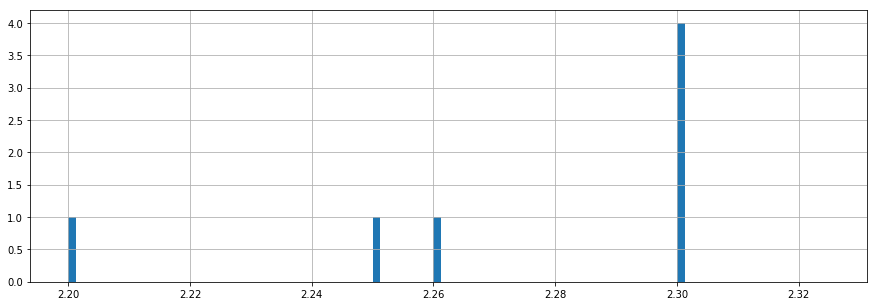


 Редкие и выбивающиеся значения вне боксплота в диапазоне 2.93-5.80 включительно, всего 2694 записей:


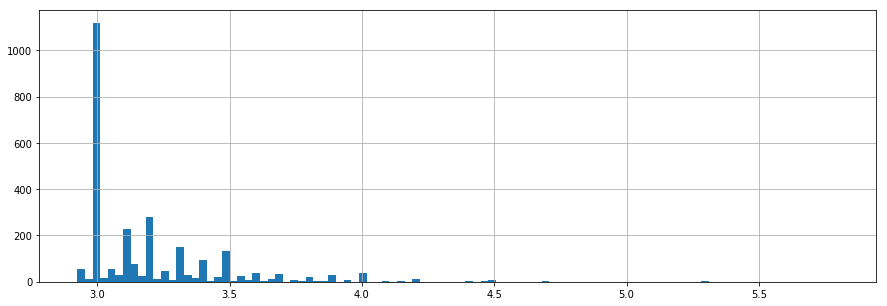

In [104]:
report('ceiling_height', df)

### Срок размещения объявления

Информация по параметру days_exposition:

 count    23585.000000
mean       170.381302
std        207.311871
min          1.000000
25%         45.000000
50%         95.000000
75%        201.000000
max       1580.000000
Name: days_exposition, dtype: float64

 Все значения:


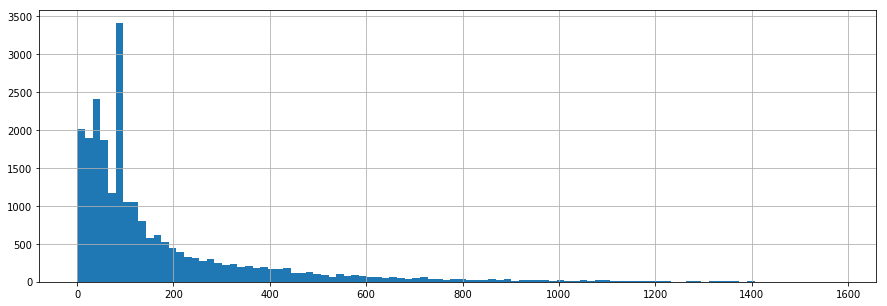


 Межквартильный размах:


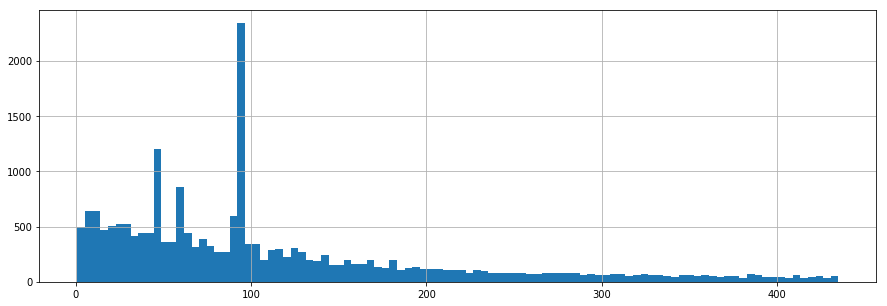


 Боксплот:


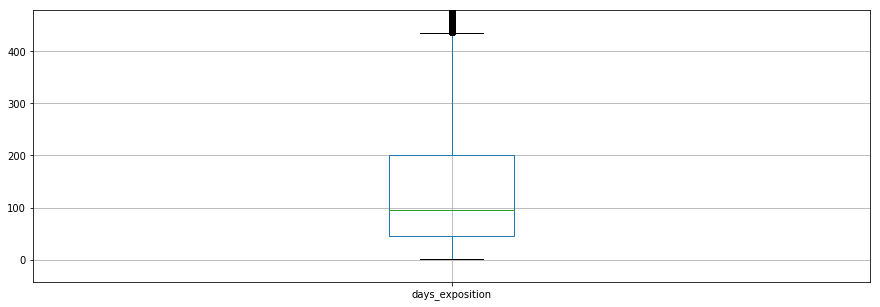


 Межквартильный размах в диапазоне 45.00-201.00,  всего 12575 записей

 Нижний ус боксплота в диапазоне 1.00-45.00, всего 5099 записей

 Верхний ус боксплота в диапазоне 201.00-435.00, всего 3627 записей

 Редкие и выбивающиеся значения вне боксплота в диапазоне 435.00-1580.00 включительно, всего 2284 записей:


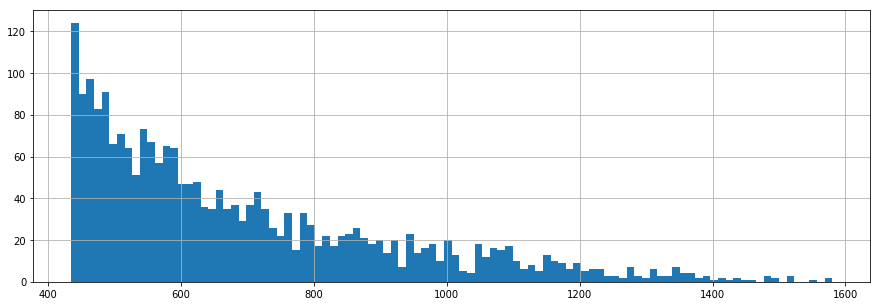

In [105]:
report('days_exposition', df)

### Изучение параметров: вывод

Редкие и выбивающие значения (вне боксплота) присутствуют в общей площади, цене, количестве комнат, высоте потолков, сроке продажи. Одним словом, во всех параметрах.

Редких и выбивающихся значений в нижнем диапазоне срока продажи нет. Если смотреть по нижнему хвосту боксплота, то быстрыми продажами можно считать сроки до 45 дней. В верхнем диапазоне есть выбивающиеся значения вне боксплота 435-1580 дней, которые можно считать необычно долгими сроками.

## Удаление

Удалим редкие и выбивающиеся значения, находящиеся вне боксплотов, влияющие на цену квартиры (общая площадь, комнаты, выстоты потолков, время продажи):

In [106]:
df.drop(index=df.query('total_area >= 114.75').index, axis=0, inplace=True)
df.drop(index=df.query('rooms >= 6').index, axis=0, inplace=True)
df.drop(index=df.query('ceiling_height <= 2.32 or ceiling_height >= 2.93 ').index, axis=0, inplace=True)
df.drop(index=df.query('days_exposition >= 435').index, axis=0, inplace=True)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18547 entries, 0 to 23698
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          18547 non-null  int64         
 1   last_price            18547 non-null  int32         
 2   total_area            18547 non-null  float64       
 3   first_day_exposition  18547 non-null  datetime64[ns]
 4   floor                 18547 non-null  int64         
 5   studio                18547 non-null  bool          
 6   open_plan             18547 non-null  bool          
 7   ceiling_height        18547 non-null  float64       
 8   rooms                 18547 non-null  int64         
 9   locality_name         18547 non-null  object        
 10  floors_total          18547 non-null  int32         
 11  living_area           18547 non-null  float64       
 12  is_apartment          18547 non-null  bool          
 13  kitchen_area    

## Зависимости цены квартиры от некоторых параметров

Создадим функцию вывода корреляции для дальнейшего использования:

In [108]:
def correlation(column1, data):
    figsize = (15, 5)
    alpha=0.08
    column2 = 'last_price'
   
    correlation = data[column1].corr(data[column2])
    if 1 >= correlation >= -1:
        data.plot(x=column1, y=column2, kind='scatter', alpha=alpha, figsize=figsize)
        plt.show()
        print(f'Коэффициент корреляции по цене квартиры и {column1}',
              f'составляет {correlation:.2f}', '\n')
    else:
        print(f'Коэффициент корреляции по цене квартиры и {column1}',
              f'не рассчитывается из-за отсутствия разброса значений', '\n')

### Зависимость цены квартиры от цены за квадратный метр

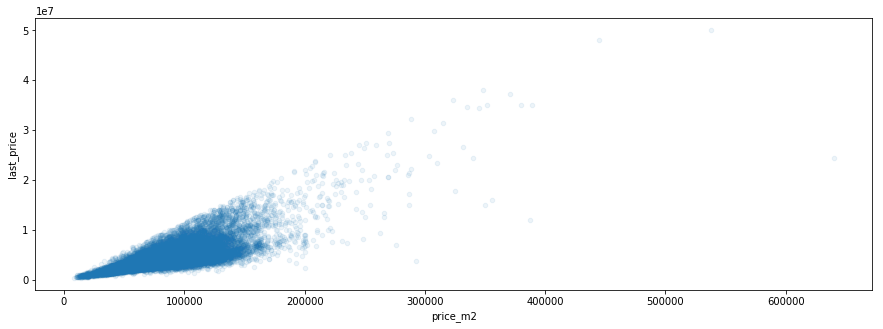

Коэффициент корреляции по цене квартиры и price_m2 составляет 0.71 



In [109]:
correlation('price_m2', df)

### Зависимость цены квартиры от количества комнат

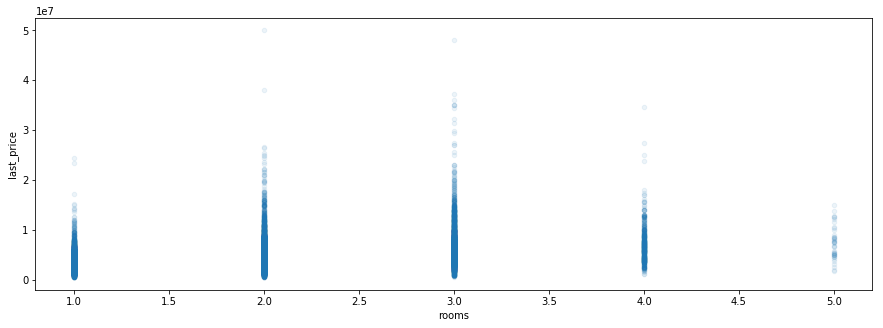

Коэффициент корреляции по цене квартиры и rooms составляет 0.40 



In [110]:
correlation('rooms', df)

### Зависимость цены квартиры от близости к центру

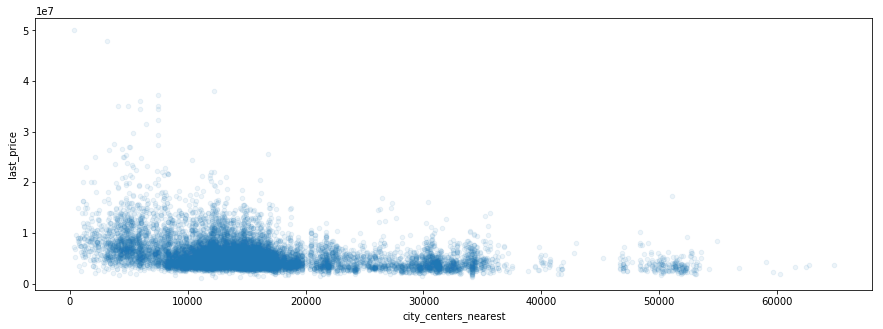

Коэффициент корреляции по цене квартиры и city_centers_nearest составляет -0.30 



In [111]:
correlation('city_centers_nearest', df)

### Зависимость цены квартиры от типа этажа

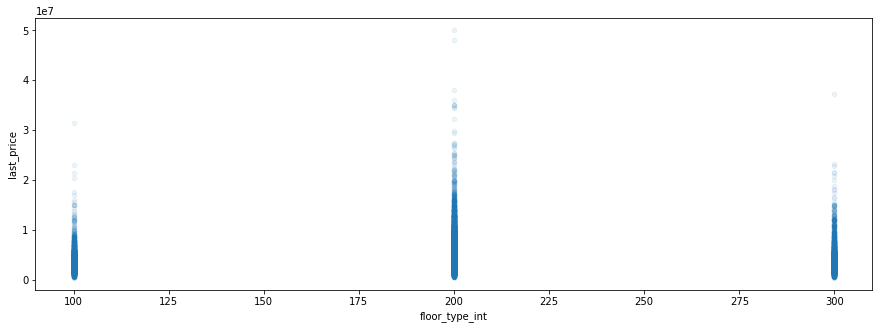

Коэффициент корреляции по цене квартиры и floor_type_int составляет 0.03 



In [112]:
# 100 - первый этаж, 200 - другой этаж, 300 - последний этаж
correlation('floor_type_int', df)

### Зависимость цены квартиры от даты размещения объявления

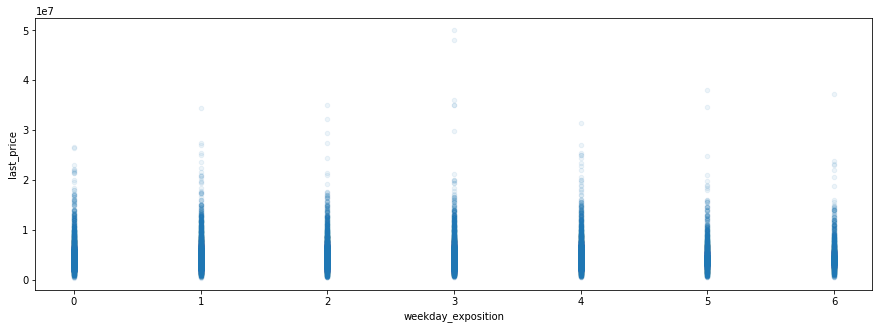

Коэффициент корреляции по цене квартиры и weekday_exposition составляет -0.01 



In [113]:
correlation('weekday_exposition', df)

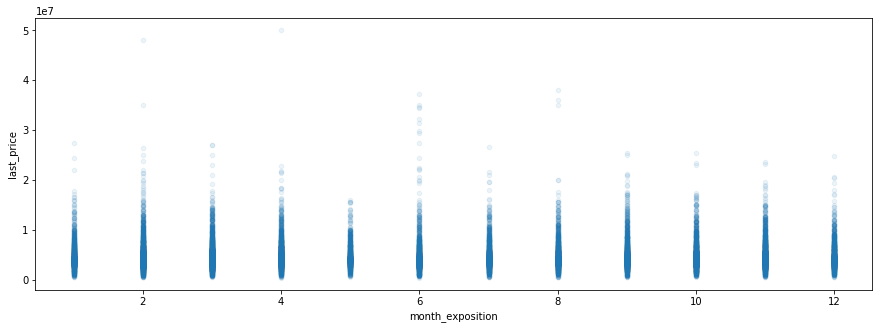

Коэффициент корреляции по цене квартиры и month_exposition составляет -0.00 



In [114]:
correlation('month_exposition', df)

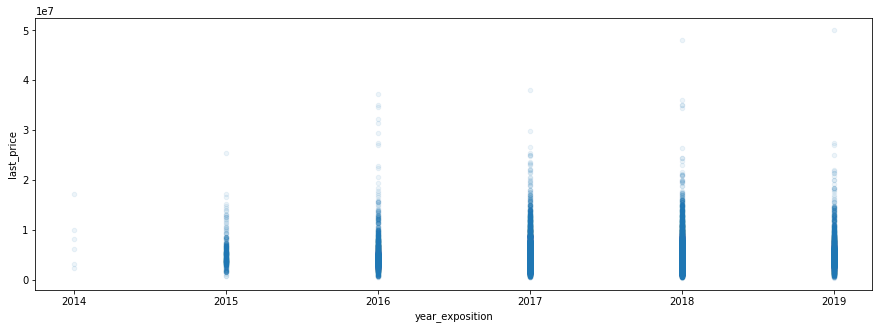

Коэффициент корреляции по цене квартиры и year_exposition составляет 0.02 



In [115]:
correlation('year_exposition', df)

### Зависимости цены квартиры от некоторых параметров: вывод

Степень влияния параметров на цену квартиры по убыванию силы: цена за квадратный метр (0.71), количество комнат (0.40), близость к центру (-0.30). Зависимость цены квартиры от типа этажа (0.03), дня недели, месяца и года размещения объявления  (~ 0) отсутствует.

## 10 населённых пунктов с наибольшим числом объявлений.

In [116]:
top10_announcements = df['locality_name'].value_counts().head(10)
top10_announcements

санкт-петербург      11668
посёлок мурино         475
посёлок шушары         403
всеволожск             341
посёлок парголово      304
колпино                297
пушкин                 286
деревня кудрово        262
гатчина                259
выборг                 190
Name: locality_name, dtype: int64

Средняя цена квадратного метра в этих населённых пунктах:

In [117]:
top10_announcements_price_M2 = df.query('locality_name in @top10_announcements.index').groupby(
    by='locality_name')['price_m2'].mean().sort_values().astype('int')
top10_announcements_price_M2

locality_name
выборг                57799
гатчина               68690
всеволожск            68780
колпино               75432
посёлок шушары        78712
посёлок мурино        86004
посёлок парголово     90016
деревня кудрово       92663
пушкин               101237
санкт-петербург      107771
Name: price_m2, dtype: int32

In [118]:
print(f'Минимальная цена квадратного метра составляет {top10_announcements_price_M2.min()}',
      f'в населенном пункте: {top10_announcements_price_M2.head(1).index[0]}')

Минимальная цена квадратного метра составляет 57799 в населенном пункте: выборг


In [119]:
print(f'Макимальная цена квадратного метра составляет {top10_announcements_price_M2.max()}',
      f'в населенном пункте: {top10_announcements_price_M2.tail(1).index[0]}')

Макимальная цена квадратного метра составляет 107771 в населенном пункте: санкт-петербург


### 10 населённых пунктов с наибольшим числом объявлений: вывод

Цена квадратного метра в Питере в среднем практически в два раза выше, чем в Выборге.

## Центр города

Сгруппируем данные по удаленности от центра в Питере и рассчитаем среднюю цену квартиры для каждой зоны удаленности:

In [120]:
df['center_km'] = (df['city_centers_nearest'] / 1000).round(0)
df['center_km'] = df['center_km'].apply(lambda x: max(x, 1))
df['price_per_km'] = df['last_price'] / df['center_km']
group_price_per_km = (df
 .query('locality_name == "санкт-петербург"')
 .groupby('center_km')['price_per_km']
 .mean()
 .astype('int')
)
group_price_per_km

center_km
1.0     9892127
2.0     4490427
3.0     2741872
4.0     2108347
5.0     1801592
6.0     1351026
7.0     1198171
8.0      913443
9.0      632183
10.0     553248
11.0     497908
12.0     465988
13.0     442794
14.0     380887
15.0     361489
16.0     325124
17.0     291231
18.0     259011
19.0     264162
20.0     303635
21.0     246193
22.0     235999
23.0     207853
24.0     159828
25.0     163558
26.0     154272
27.0      83333
28.0     164196
29.0     125862
Name: price_per_km, dtype: int32

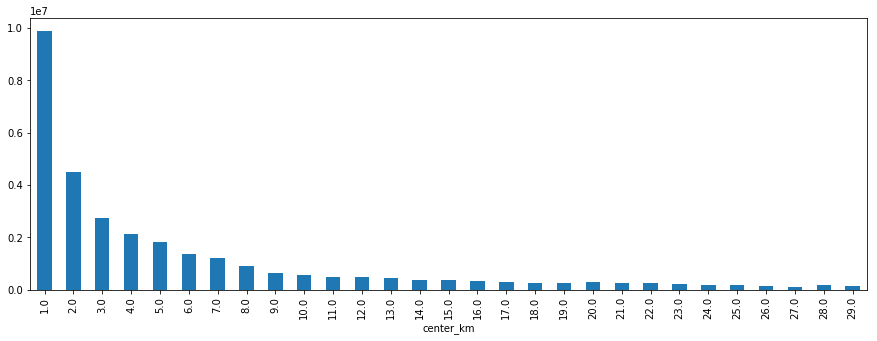

In [121]:
group_price_per_km.plot(x=[0], y='center_km', kind='bar', figsize=(15,5))
plt.show()

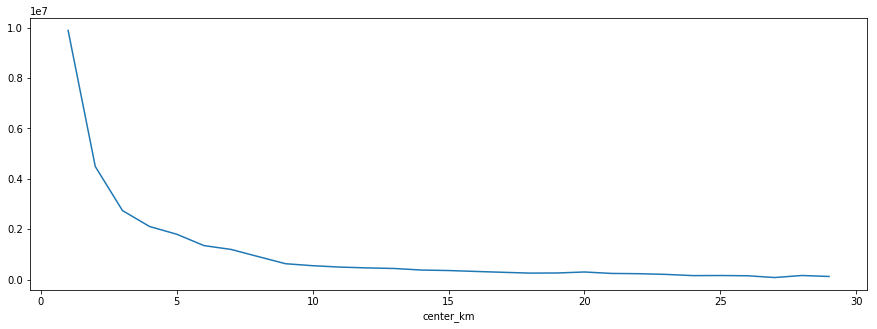

In [122]:
group_price_per_km.plot(x=[0], y='center_km', kind='line', figsize=(15,5))
plt.show()

Сильнее всего график меняется в точке 2, что означает радикальное повышение цены квартиры при снижении расстояния до центра меньше двух километров. В центр города входит область до двух километров.

### Общая площадь квартир по всему Питеру:

In [123]:
center = 2

Информация по параметру total_area:

 count    11668.000000
mean        53.916416
std         18.974039
min         12.000000
25%         39.600000
50%         49.800000
75%         64.510000
max        114.600000
Name: total_area, dtype: float64

 Все значения:


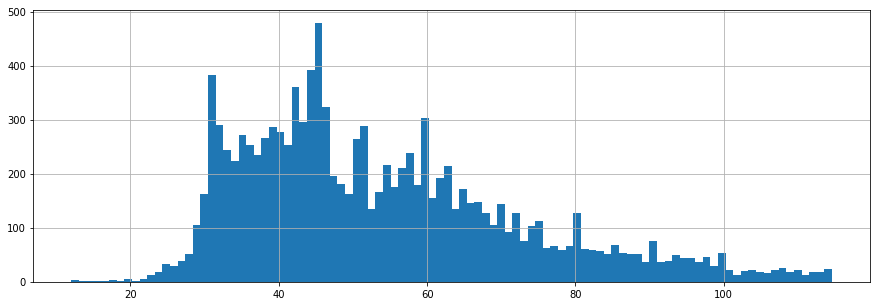


 Межквартильный размах:


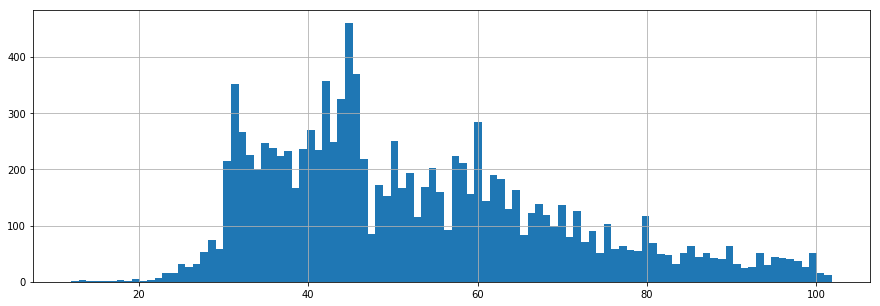


 Боксплот:


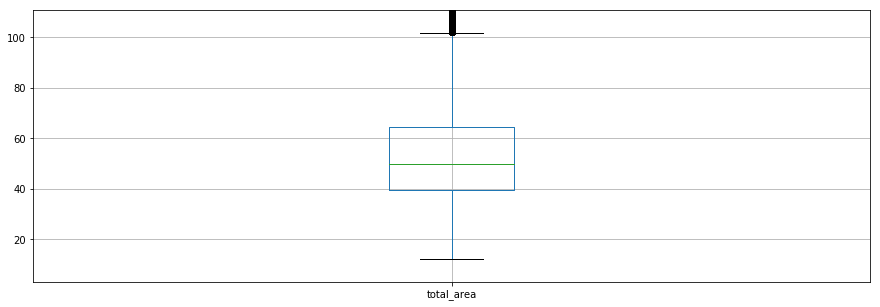


 Межквартильный размах в диапазоне 39.60-64.51,  всего 5838 записей

 Нижний ус боксплота в диапазоне 12.00-39.60, всего 2913 записей

 Верхний ус боксплота в диапазоне 64.51-101.88, всего 2672 записей

 Редкие и выбивающиеся значения вне боксплота в диапазоне 101.88-114.60 включительно, всего 245 записей:


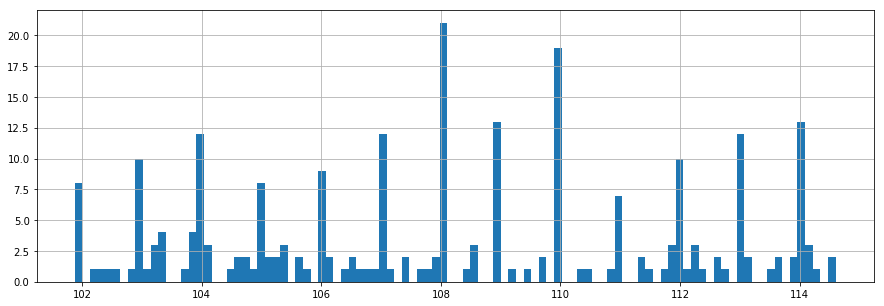

In [124]:
report('total_area', df.query('locality_name == "санкт-петербург"'))

### Общая площадь квартир по центру Питера:

Информация по параметру total_area:

 count     55.000000
mean      69.940000
std       21.467069
min       12.000000
25%       58.400000
50%       71.000000
75%       83.550000
max      109.000000
Name: total_area, dtype: float64

 Все значения:


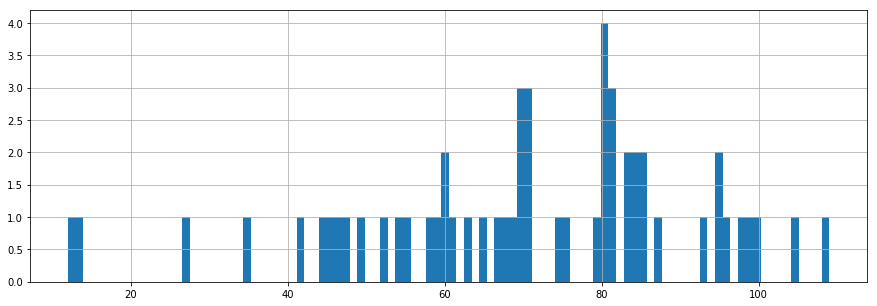


 Межквартильный размах:


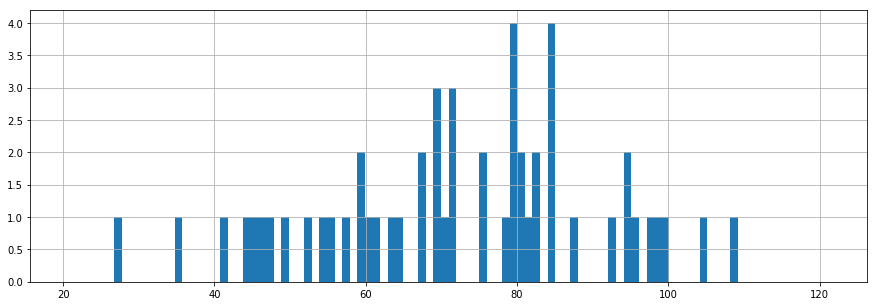


 Боксплот:


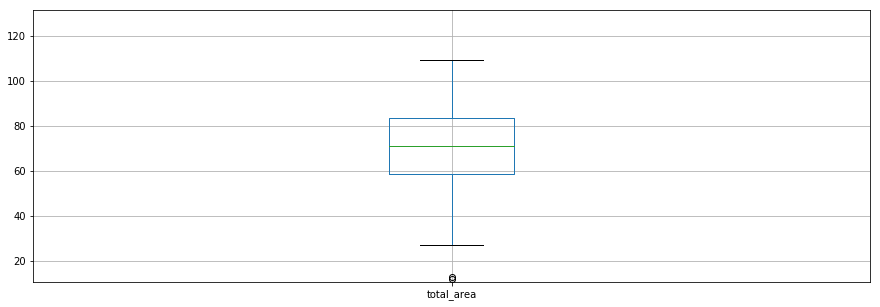


 Межквартильный размах в диапазоне 58.40-83.55,  всего 27 записей

 Нижний ус боксплота в диапазоне 20.68-58.40, всего 12 записей

 Верхний ус боксплота в диапазоне 83.55-121.27, всего 14 записей

 Редкие и выбивающиеся значения вне боксплота в диапазоне 12.00-20.68, всего 2 записей:


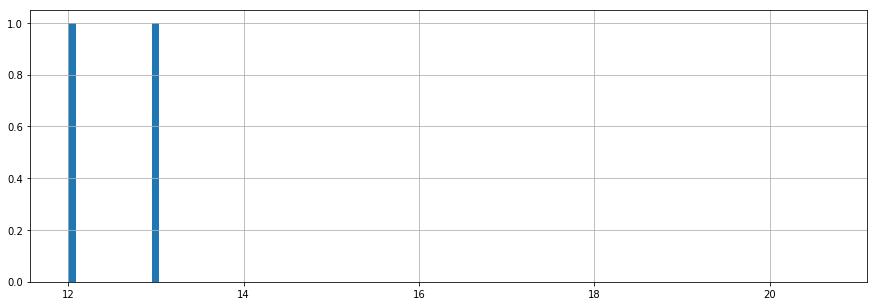

In [125]:
report('total_area', df.query('locality_name == "санкт-петербург" and center_km < @center'))

In [126]:
d50_center = df.query('locality_name == "санкт-петербург" and center_km < @center')['total_area'].describe()['50%']
d50_town = df.query('locality_name == "санкт-петербург"')['total_area'].describe()['50%']
mean_center = df.query('locality_name == "санкт-петербург" and center_km < @center')['total_area'].describe()['mean']
mean_town = df.query('locality_name == "санкт-петербург"')['total_area'].describe()['mean']
print(f'Медианная площадь квартир в центре Питера больше, чем по всему городу на',
      f'{(d50_center - d50_town) / d50_town:.0%}')
print(f'Средняя площадь квартир в центре Питера больше, чем по всему городу на',
      f'{(mean_center - mean_town) / mean_town:.0%}')

Медианная площадь квартир в центре Питера больше, чем по всему городу на 43%
Средняя площадь квартир в центре Питера больше, чем по всему городу на 30%


### Цены квартир по всему Питеру:

Информация по параметру last_price:

 count       11668
mean      5834703
std       2968432
min       1190000
25%       4000000
50%       5000000
75%       6700000
max      50000000
Name: last_price, dtype: int32

 Все значения:


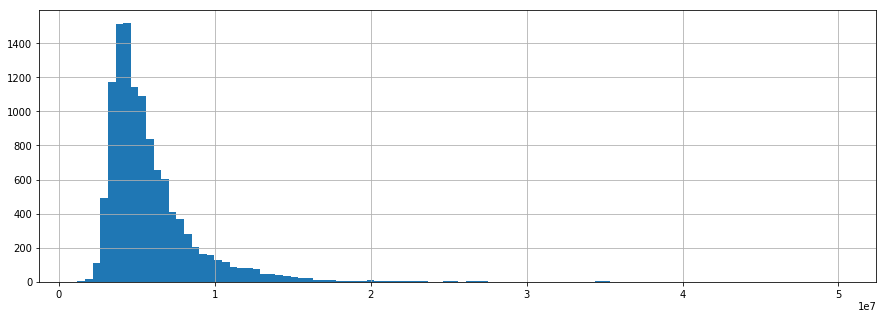


 Межквартильный размах:


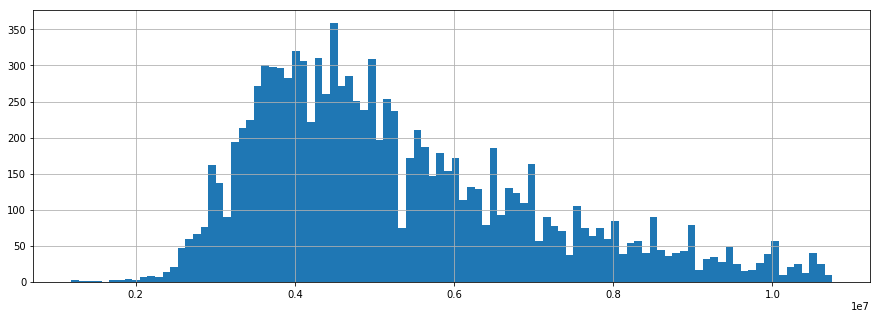


 Боксплот:


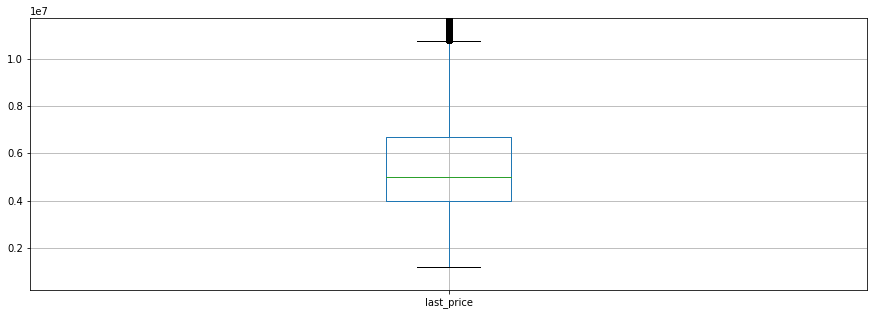


 Межквартильный размах в диапазоне 4000000.00-6700000.00,  всего 5801 записей

 Нижний ус боксплота в диапазоне 1190000.00-4000000.00, всего 2888 записей

 Верхний ус боксплота в диапазоне 6700000.00-10750000.00, всего 2256 записей

 Редкие и выбивающиеся значения вне боксплота в диапазоне 10750000.00-50000000.00 включительно, всего 723 записей:


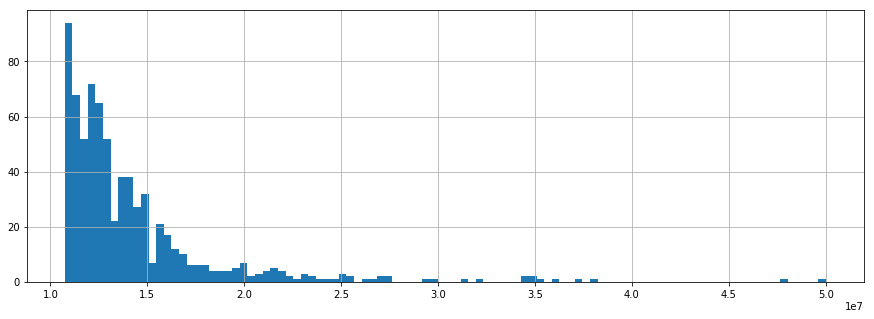

In [127]:
report('last_price', df.query('locality_name == "санкт-петербург"'))

### Цены квартир по центру Питера:

Информация по параметру last_price:

 count          55
mean      9892127
std       6797541
min       2400000
25%       6800000
50%       8600000
75%      10250000
max      50000000
Name: last_price, dtype: int32

 Все значения:


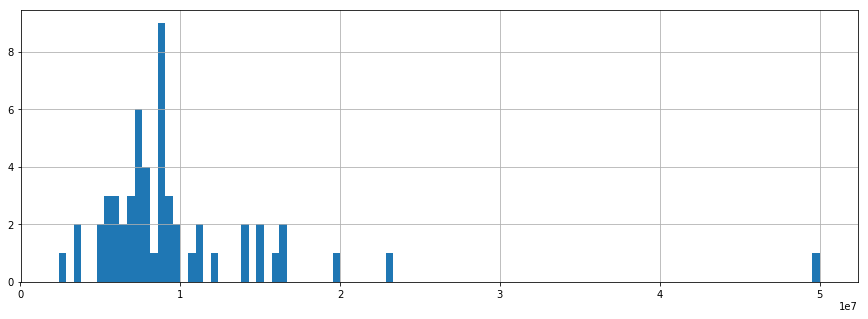


 Межквартильный размах:


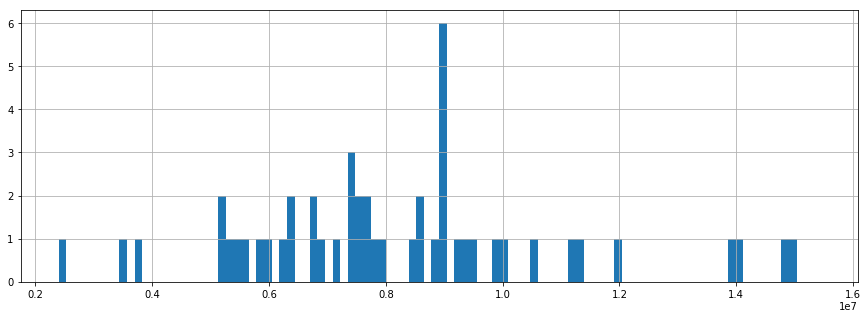


 Боксплот:


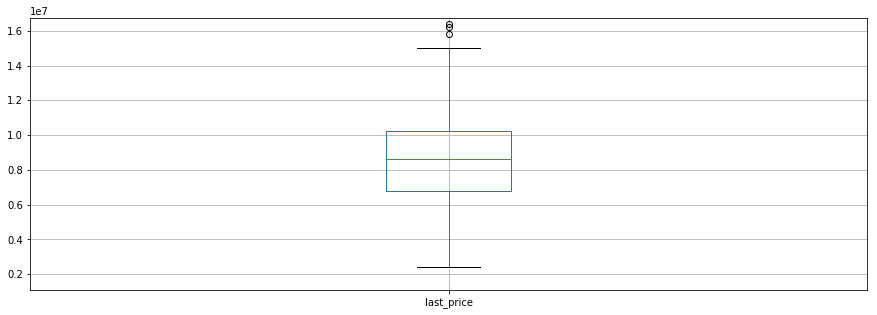


 Межквартильный размах в диапазоне 6800000.00-10250000.00,  всего 28 записей

 Нижний ус боксплота в диапазоне 2400000.00-6800000.00, всего 13 записей

 Верхний ус боксплота в диапазоне 10250000.00-15425000.00, всего 8 записей

 Редкие и выбивающиеся значения вне боксплота в диапазоне 15425000.00-50000000.00 включительно, всего 6 записей:


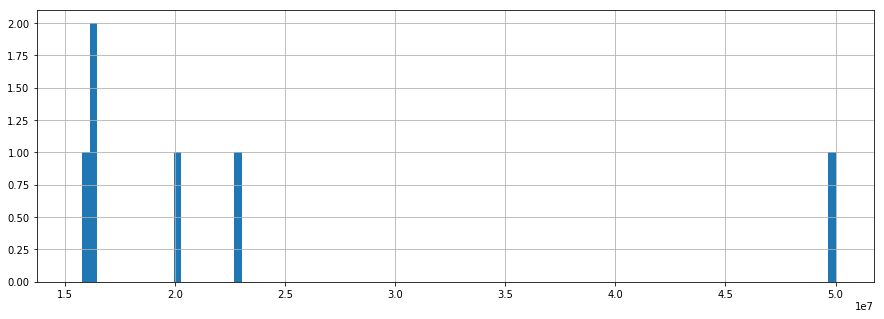

In [128]:
report('last_price', df.query('locality_name == "санкт-петербург" and center_km < @center'))

In [129]:
d50_center = df.query('locality_name == "санкт-петербург" and center_km < @center')['last_price'].describe()['50%']
d50_town = df.query('locality_name == "санкт-петербург"')['last_price'].describe()['50%']
mean_center = df.query('locality_name == "санкт-петербург" and center_km < @center')['last_price'].describe()['mean']
mean_town = df.query('locality_name == "санкт-петербург"')['last_price'].describe()['mean']
print(f'Медианная цена квартир в центре Питера больше, чем по всему городу на',
      f'{(d50_center - d50_town) / d50_town:.0%}')
print(f'Средняя цена квартир в центре Питера больше, чем по всему городу на',
      f'{(mean_center - mean_town) / mean_town:.0%}')

Медианная цена квартир в центре Питера больше, чем по всему городу на 72%
Средняя цена квартир в центре Питера больше, чем по всему городу на 70%


### Число комнат по всему Питеру:

Информация по параметру rooms:

 count    11668
mean         1
std          0
min          1
25%          1
50%          2
75%          3
max          5
Name: rooms, dtype: int64

 Все значения:


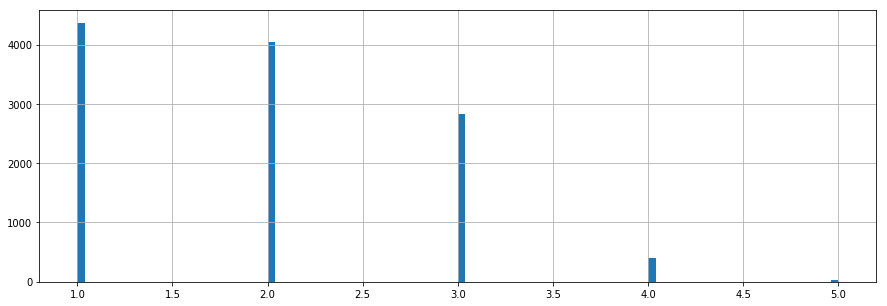


 Межквартильный размах:


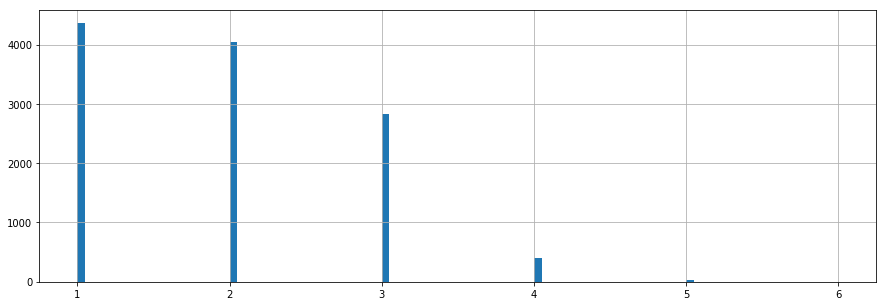


 Боксплот:


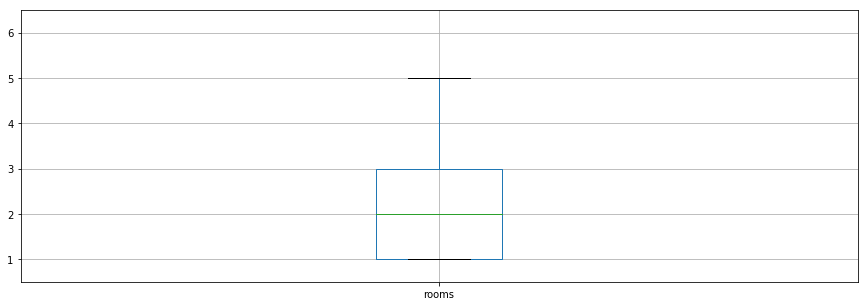


 Межквартильный размах в диапазоне 1.00-3.00,  всего 8414 записей

 Нижний ус боксплота в диапазоне 1.00-1.00, всего 0 записей

 Верхний ус боксплота в диапазоне 3.00-6.00, всего 3254 записей


In [130]:
report('rooms', df.query('locality_name == "санкт-петербург"'))

### Число комнат по центру Питера:

Информация по параметру rooms:

 count    55
mean      2
std       0
min       1
25%       2
50%       2
75%       3
max       4
Name: rooms, dtype: int64

 Все значения:


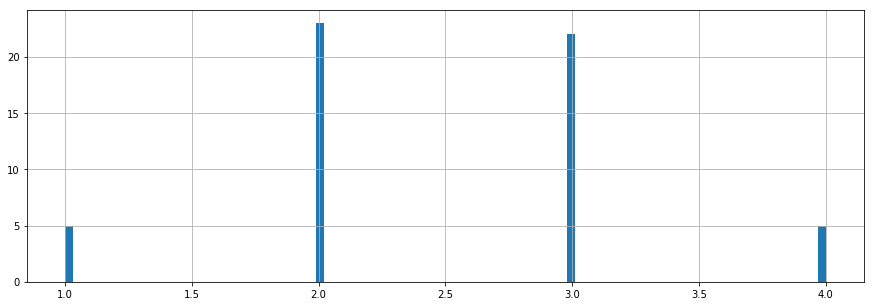


 Межквартильный размах:


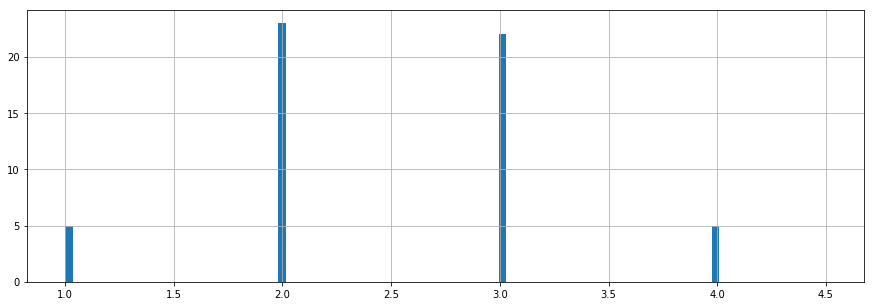


 Боксплот:


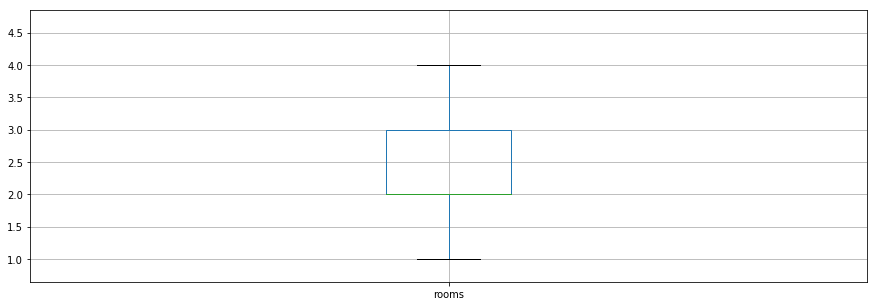


 Межквартильный размах в диапазоне 2.00-3.00,  всего 23 записей

 Нижний ус боксплота в диапазоне 1.00-2.00, всего 5 записей

 Верхний ус боксплота в диапазоне 3.00-4.50, всего 27 записей


In [131]:
report('rooms', df.query('locality_name == "санкт-петербург" and center_km < @center'))

In [132]:
d50_center = df.query('locality_name == "санкт-петербург" and center_km < @center')['rooms'].describe()['50%']
d50_town = df.query('locality_name == "санкт-петербург"')['rooms'].describe()['50%']
mean_center = df.query('locality_name == "санкт-петербург" and center_km < @center')['rooms'].describe()['mean']
mean_town = df.query('locality_name == "санкт-петербург"')['rooms'].describe()['mean']
print(f'Медианное количество комнат в центре Питера больше, чем по всему городу на',
      f'{(d50_center - d50_town) / d50_town:.0%}')
print(f'Среднее количество комнат в центре Питера больше, чем по всему городу на',
      f'{(mean_center - mean_town) / mean_town:.0%}')

Медианное количество комнат в центре Питера больше, чем по всему городу на 0%
Среднее количество комнат в центре Питера больше, чем по всему городу на 28%


### Высота потолков по всему Питеру:

Информация по параметру ceiling_height:

 count    11668.000000
mean         2.655728
std          0.094634
min          2.400000
25%          2.600000
50%          2.700000
75%          2.700000
max          2.920000
Name: ceiling_height, dtype: float64

 Все значения:


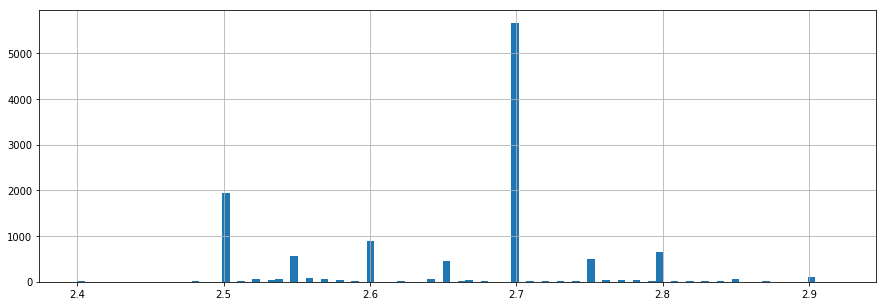


 Межквартильный размах:


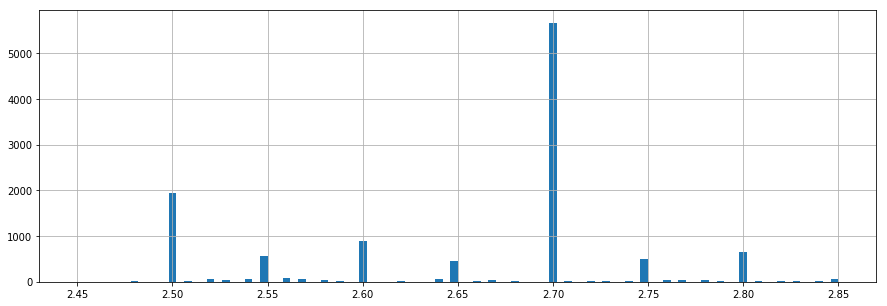


 Боксплот:


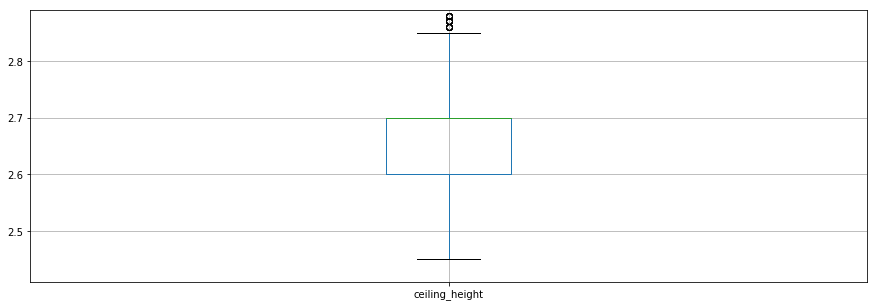


 Межквартильный размах в диапазоне 2.60-2.70,  всего 1503 записей

 Нижний ус боксплота в диапазоне 2.45-2.60, всего 2904 записей

 Верхний ус боксплота в диапазоне 2.70-2.85, всего 7124 записей

 Редкие и выбивающиеся значения вне боксплота в диапазоне 2.40-2.45, всего 10 записей:


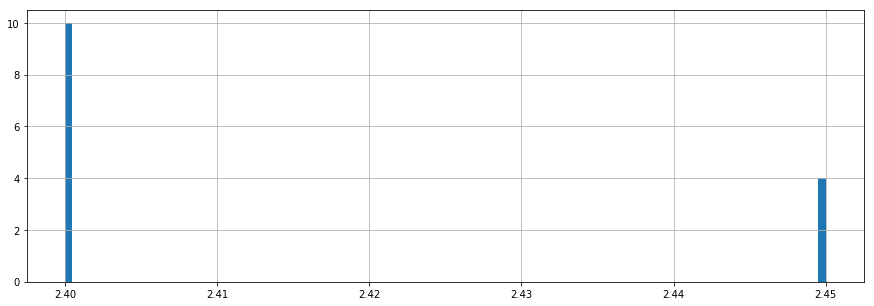


 Редкие и выбивающиеся значения вне боксплота в диапазоне 2.85-2.92 включительно, всего 127 записей:


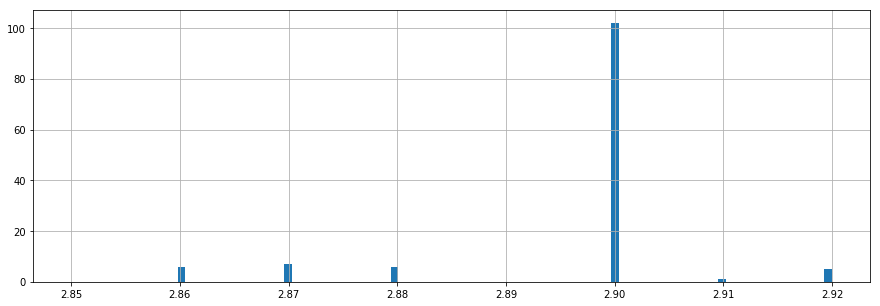

In [133]:
report('ceiling_height', df.query('locality_name == "санкт-петербург"'))

### Высота потолков по центру Питера:

Информация по параметру ceiling_height:

 count    55.000000
mean      2.701455
std       0.085817
min       2.500000
25%       2.700000
50%       2.700000
75%       2.700000
max       2.900000
Name: ceiling_height, dtype: float64

 Все значения:


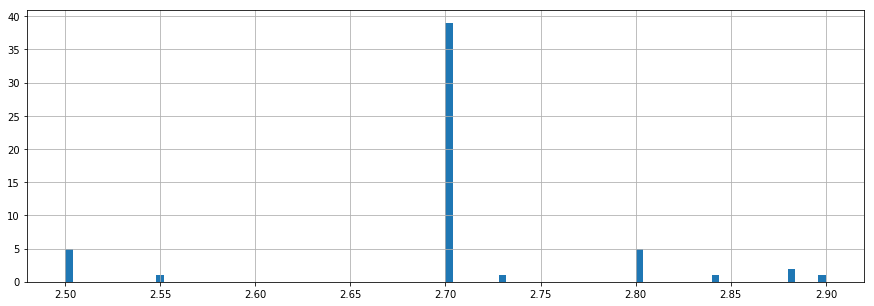


 Межквартильный размах:


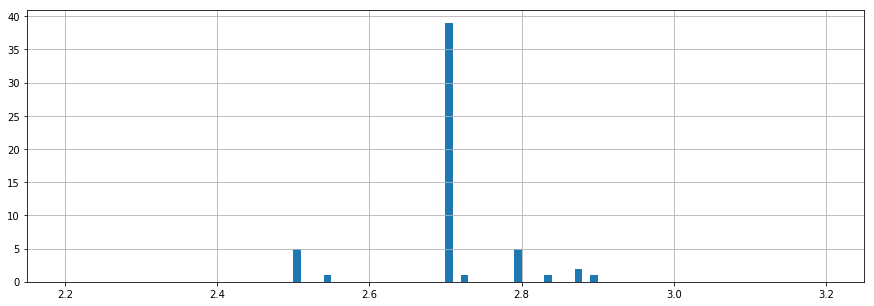


 Боксплот:


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:1479: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=2.7, top=2.7
  ret = ax.set_ylim(*args, **kwargs)


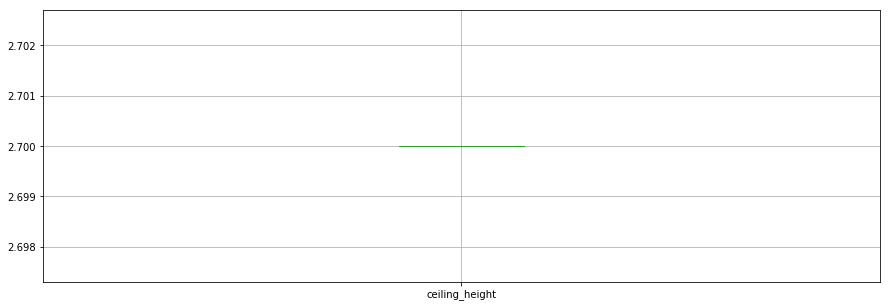


 Межквартильный размах в диапазоне 2.70-2.70,  всего 0 записей

 Нижний ус боксплота в диапазоне 2.70-2.70, всего 0 записей

 Верхний ус боксплота в диапазоне 2.70-2.70, всего 0 записей

 Редкие и выбивающиеся значения вне боксплота в диапазоне 2.50-2.70, всего 6 записей:


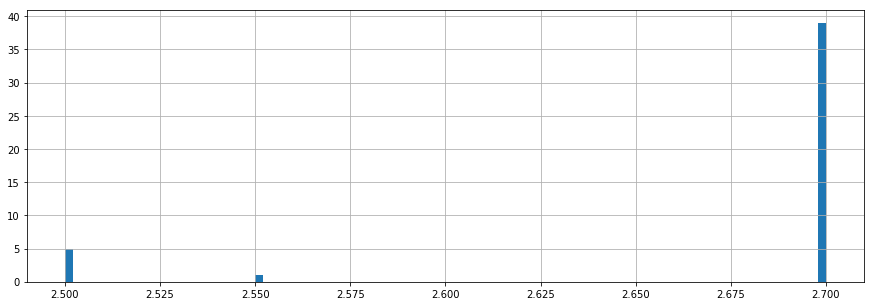


 Редкие и выбивающиеся значения вне боксплота в диапазоне 2.70-2.90 включительно, всего 49 записей:


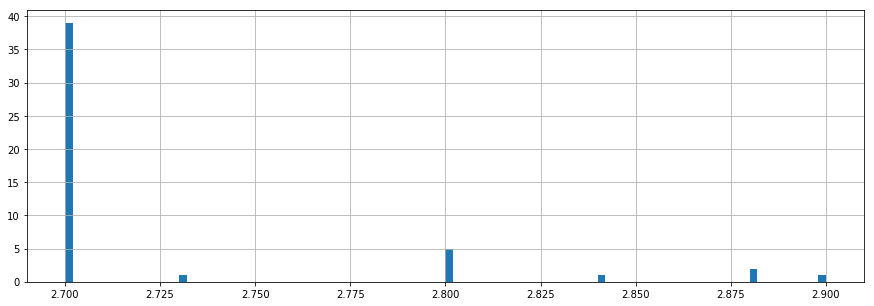

In [134]:
report('ceiling_height', df.query('locality_name == "санкт-петербург" and center_km < @center'))

In [135]:
d50_center = df.query('locality_name == "санкт-петербург" and center_km < @center')['ceiling_height'].describe()['50%']
d50_town = df.query('locality_name == "санкт-петербург"')['ceiling_height'].describe()['50%']
mean_center = df.query('locality_name == "санкт-петербург" and center_km < @center')['ceiling_height'].describe()['mean']
mean_town = df.query('locality_name == "санкт-петербург"')['ceiling_height'].describe()['mean']
print(f'Медианная высота потолков в центре Питера больше, чем по всему городу на',
      f'{(d50_center - d50_town) / d50_town:.0%}')
print(f'Средняя высота потолков в центре Питера больше, чем по всему городу на',
      f'{(mean_center - mean_town) / mean_town:.0%}')

Медианная высота потолков в центре Питера больше, чем по всему городу на 0%
Средняя высота потолков в центре Питера больше, чем по всему городу на 2%


### Центр города: вывод

Прослеживается рост всех исследованных параметров (медиана и среднее) от всего города к центру: потолки выше на 0%-2%, количество комнат больше на 0%-28%, площадь больше на 30%-43%, а цены выше на 70%-72%.

## Анализ зависимости цены от некоторых параметров квартир Санкт-Петербурга

### Зависимость цены квартиры от количества комнат по всему Питеру:

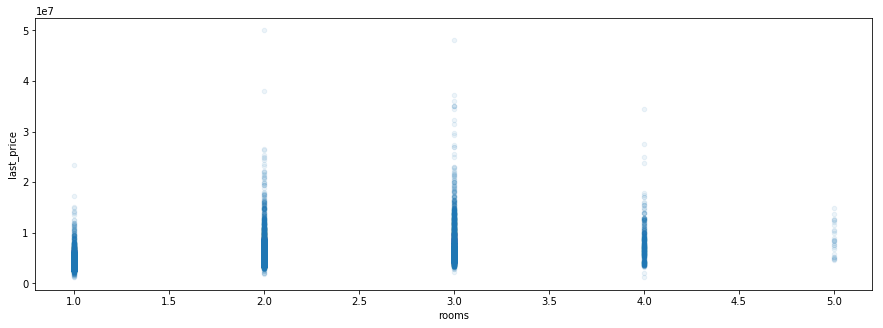

Коэффициент корреляции по цене квартиры и rooms составляет 0.44 



In [136]:
correlation('rooms', df.query('locality_name == "санкт-петербург"'))

### Зависимость цены квартиры от количества комнат по центру Питера:

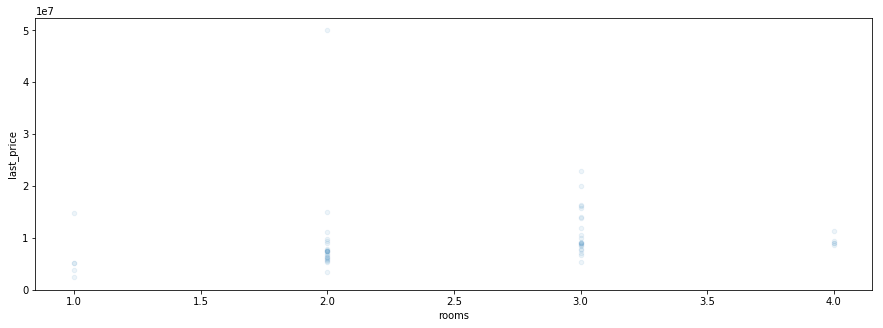

Коэффициент корреляции по цене квартиры и rooms составляет 0.16 



In [137]:
correlation('rooms', df.query('locality_name == "санкт-петербург" and center_km < @center'))

### Зависимость цены квартиры от типа этажа по всему Питеру:

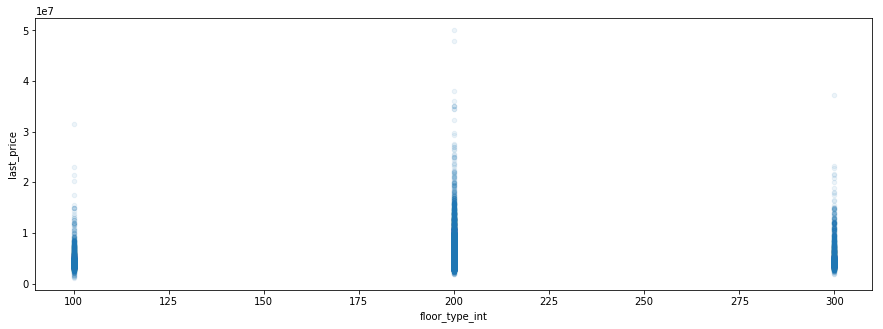

Коэффициент корреляции по цене квартиры и floor_type_int составляет 0.05 



In [138]:
# 100 - первый этаж, 200 - другой этаж, 300 - последний этаж
correlation('floor_type_int', df.query('locality_name == "санкт-петербург"'))

### Зависимость цены квартиры от типа этажа по центру Питера:

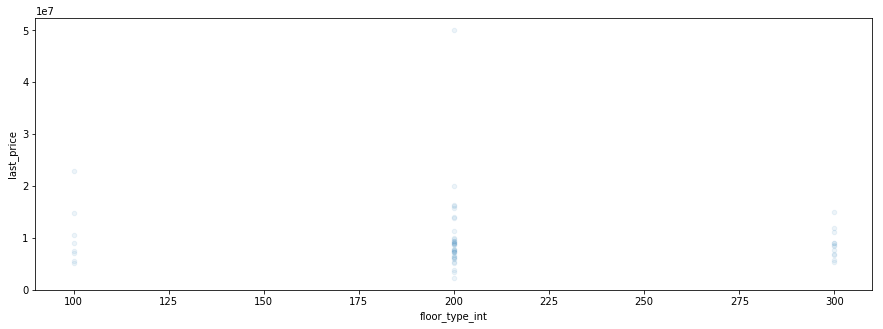

Коэффициент корреляции по цене квартиры и floor_type_int составляет -0.07 



In [139]:
# 100 - первый этаж, 200 - другой этаж, 300 - последний этаж
correlation('floor_type_int', df.query('locality_name == "санкт-петербург" and center_km < @center'))

### Зависимость цены квартиры от удаленности от центра по всему Питеру:

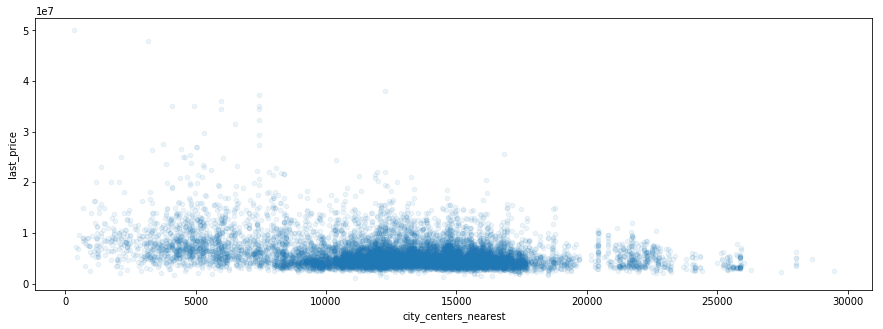

Коэффициент корреляции по цене квартиры и city_centers_nearest составляет -0.31 



In [140]:
correlation('city_centers_nearest', df.query('locality_name == "санкт-петербург"'))

### Зависимость цены квартиры от удаленности от центра по центру Питера:

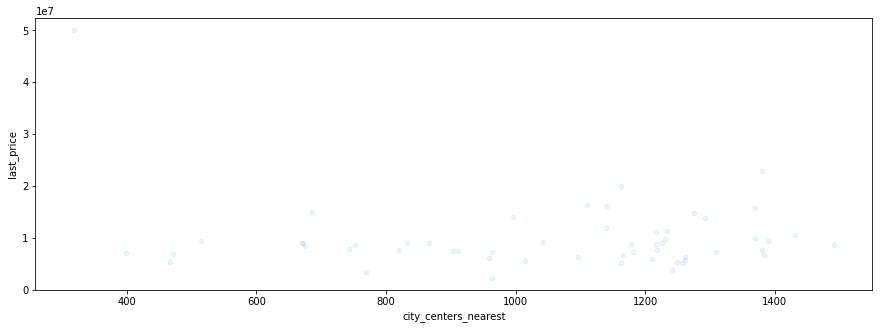

Коэффициент корреляции по цене квартиры и city_centers_nearest составляет -0.16 



In [141]:
correlation('city_centers_nearest', df.query('locality_name == "санкт-петербург" and center_km < @center'))

### Зависимость цены квартиры от дня недели размещения объявления по всему Питеру:

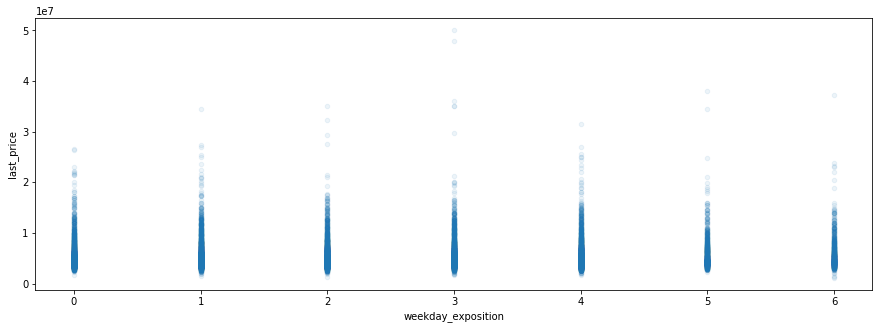

Коэффициент корреляции по цене квартиры и weekday_exposition составляет 0.00 



In [142]:
correlation('weekday_exposition', df.query('locality_name == "санкт-петербург"'))

### Зависимость цены квартиры от дня недели размещения объявления по центру Питера:

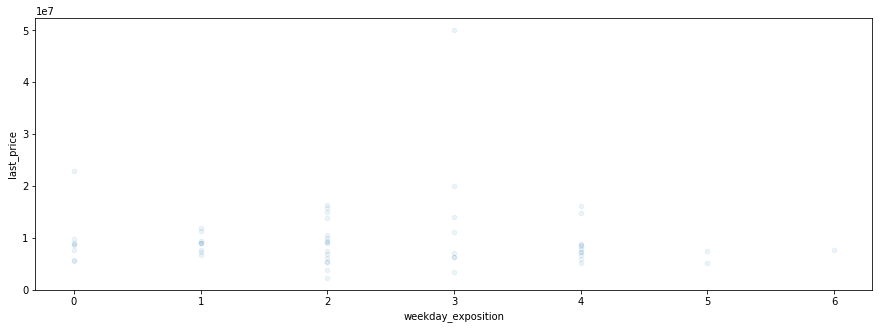

Коэффициент корреляции по цене квартиры и weekday_exposition составляет -0.01 



In [143]:
correlation('weekday_exposition', df.query('locality_name == "санкт-петербург" and center_km < @center'))

### Зависимость цены квартиры от месяца размещения объявления по всему Питеру:

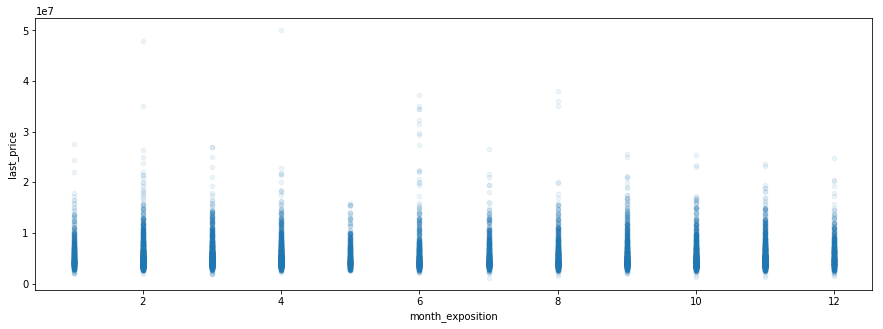

Коэффициент корреляции по цене квартиры и month_exposition составляет -0.01 



In [144]:
correlation('month_exposition', df.query('locality_name == "санкт-петербург"'))

### Зависимость цены квартиры от месяца размещения объявления по центру Питера:

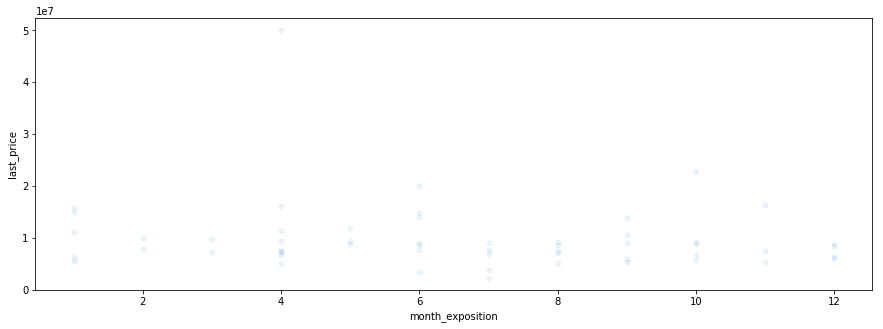

Коэффициент корреляции по цене квартиры и month_exposition составляет -0.15 



In [145]:
correlation('month_exposition', df.query('locality_name == "санкт-петербург" and center_km < @center'))

### Зависимость цены квартиры от года размещения объявления по всему Питеру:

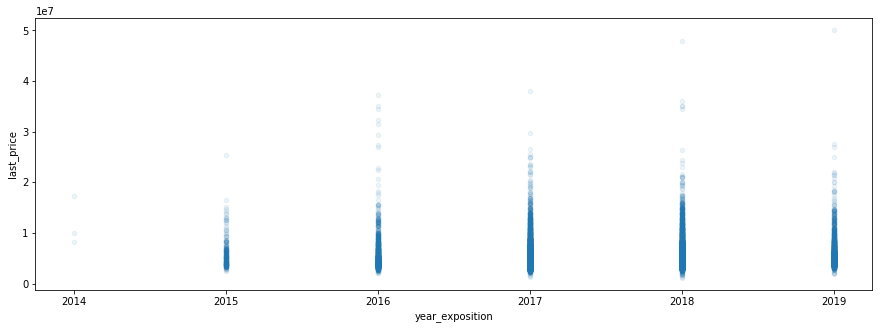

Коэффициент корреляции по цене квартиры и year_exposition составляет 0.04 



In [146]:
correlation('year_exposition', df.query('locality_name == "санкт-петербург"'))

### Зависимость цены квартиры от года размещения объявления по центру Питера:

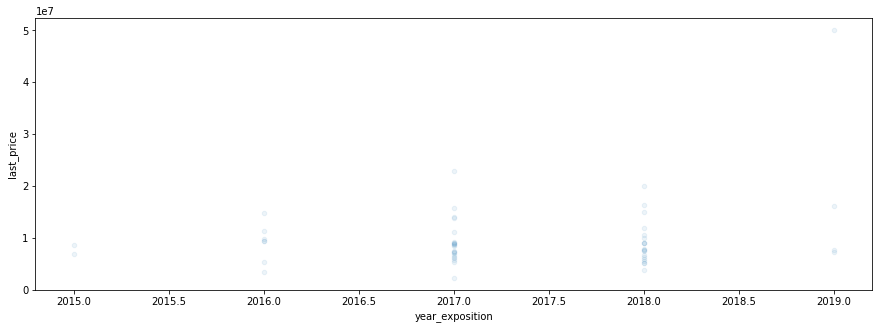

Коэффициент корреляции по цене квартиры и year_exposition составляет 0.24 



In [147]:
correlation('year_exposition', df.query('locality_name == "санкт-петербург" and center_km < @center'))

### Анализ зависимости цены от некоторых параметров квартир Санкт-Петербурга: вывод

Зависимость цены квартиры от количества комнат положительная и в три раза меньше в центре города (0.44 по городу, 0.16 в центре).

Зависимость цены квартиры от типа этажа (первый - другой - последний) по всему Питеру (0.05) и по центру (-0.07) разнонаправлена и стремится к нулю.

Зависимость цены квартиры от удаленности от центра по всему Питеру (-0.31) и по центру Питера (0.08) различается в разы, в том числе по направлению. Это ожидаемо, так как расстояние до центра по всему городу варьируется гораздо сильнее (30 км), чем в центре.

Зависимость цены квартиры от дня недели размещения объявления по всему Питеру (0) и в центре (-0.01) нулевая.

Зависимость цены квартиры от месяца размещения объявления повторяет ситуация с днем недели: по всему Питеру нулевая (-0.01), в центре слабая отрицательная (-0.15). В центре города самые высокие цены выставляются в начале года, немного снижаясь к концу.

Зависимость цены квартиры от года размещения объявления очень слабая по всему Питеру (0.04) и в разы сильнее в центре (0.24). Это значит, что цены по городу с годами практически не растут, а в центре растут быстрее.

### Шаг 5. Общий вывод

Проведена работа по предобработке и анализу. Видно, что в Санкт-Петербурге параметры квартир (исключая расстояния) выше, чем в области, а в центре Питера выше, чем в целом по городу. Выявлены различия в зависимости цены от параметров квартир в области, в целом по городу и в центре.